In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [2]:
data_int=pd.read_csv('C:/Users/MSI/Desktop/stageTT/dbs/telecom_customer_churn.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data_int

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  Tenure in Months  \
0        93225  34.827662 -118.999073                    2                 9   
1        91206  34.162515 -118.203869                    0                 9   
2        92627  33.645672 -117.922613                    0                 4   
3        94553  38.014457 -122.115432                    1                13   
4        93010  34.227846 -119.079903                    3                 3   
...        ...        ...         ...                  ...               ...   
7038     91941  32.759327 -116.997260                    0                13   
7039     95367  37.734971 -120.954271                    1                22   
7040     95432  39.108252 -123.645121                    0                 2   
7041     92075  33.001813 -117.263628                    5                67   
7042     96125  39.600599 -120.636358                    1                63   

        Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0        None           Yes                              42.39             No   
1        None           Yes                              10.69            Yes   
2     Offer E           Yes                              33.65             No   
3     Offer D           Yes                              27.82             No   
4        None           Yes                               7.38             No   
...       ...           ...                                ...            ...   
7038  Offer D           Yes                              46.68             No   
7039  Offer D           Yes                              16.20            Yes   
7040  Offer E           Yes                              18.62             No   
7041  Offer A           Yes                               2.12             No   
7042     None            No                                NaN            NaN   

     Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0                 Yes         Cable                     16.0              No   
1                 Yes         Cable                     10.0              No   
2                 Yes   Fiber Optic                     30.0              No   
3                 Yes   Fiber Optic                      4.0              No   
4                 Yes   Fiber Optic                     11.0              No   
...               ...           ...                      ...             ...   
7038              Yes           DSL                     59.0             Yes   
7039              Yes   Fiber Optic                     17.0              No   
7040              Yes           DSL                     51.0              No   
7041              Yes         Cable                     58.0             Yes   
7042              Yes         Cable                      5.0             Yes   

     Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0              Yes                     No                  Yes          Yes   
1               No         

In [5]:
data = data_int.drop_duplicates()

In [6]:
data = data.drop(columns=['Customer ID','Zip Code', 'Longitude','Latitude'])

In [7]:
data.head()

Gender  Age Married  Number of Dependents          City  \
0  Female   37     Yes                     0  Frazier Park   
1    Male   46      No                     0      Glendale   
2    Male   50      No                     0    Costa Mesa   
3    Male   78     Yes                     0      Martinez   
4  Female   75     Yes                     0     Camarillo   

   Number of Referrals  Tenure in Months    Offer Phone Service  \
0                    2                 9     None           Yes   
1                    0                 9     None           Yes   
2                    0                 4  Offer E           Yes   
3                    1                13  Offer D           Yes   
4                    3                 3     None           Yes   

   Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                              42.39             No              Yes   
1                              10.69            Yes              Yes   
2                              33.65             No              Yes   
3                              27.82             No              Yes   
4                               7.38             No              Yes   

  Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0         Cable                     16.0              No           Yes   
1         Cable                     10.0              No            No   
2   Fiber Optic                     30.0              No            No   
3   Fiber Optic                      4.0              No           Yes   
4   Fiber Optic                     11.0              No            No   

  Device Protection Plan Premium Tech Support Streaming TV Streaming Movies  \
0                     No                  Yes          Yes               No   
1                     No                   No           No              Yes   
2                    Yes                   No           No               No   
3                    Yes                   No          Yes              Yes   
4                     No                  Yes          Yes               No   

  Streaming Music Unlimited Data        Contract Paperless Billing  \
0              No            Yes        One Year               Yes   
1             Yes             No  Month-to-Month                No   
2              No            Yes  Month-to-Month               Yes   
3              No            Yes  Month-to-Month               Yes   
4              No            Yes  Month-to-Month               Yes   

    Payment Method  Monthly Charge  Total Charges  Total Refunds  \
0      Credit Card            65.6         593.30           0.00   
1      Credit Card            -4.0         542.40          38.33   
2  Bank Withdrawal            73.9         280.85           0.00   
3  Bank Withdrawal            98.0        1237.85           0.00   
4      Credit Card            83.9         267.40           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                         0                       381.51         974.81   
1                        10                        96.21         610.28   
2                         0                       134.60         415.45   
3                         0                       361.66        1599.51   
4                         0                        22.14         289.54   

  Customer Status   Churn Category                   Churn Reason  
0          Stayed              NaN                            NaN  
1          Stayed              NaN                            NaN  
2         Churned       Competitor  Competitor had better devices  
3         Churned  Dissatisfaction        Product dissatisfaction  
4         Churned  Dissatisfaction            Network reliability

In [8]:
cols=["Age","Number of Dependents","Number of Referrals","Tenure in Months","Monthly Charge","Total Revenue","Total Charges","Total Revenue","Avg Monthly GB Download"]
data[cols].mean()



Age                          46.509726
Number of Dependents          0.468692
Number of Referrals           1.951867
Tenure in Months             32.386767
Monthly Charge               63.596131
Total Revenue              3034.379056
Total Charges              2280.381264
Total Revenue              3034.379056
Avg Monthly GB Download      26.189958
dtype: float64

In [9]:
cols=["Age","Number of Dependents","Number of Referrals","Tenure in Months","Monthly Charge","Total Revenue","Total Charges","Total Revenue","Avg Monthly GB Download"]
data[cols].std()

Age                          16.750352
Number of Dependents          0.962802
Number of Referrals           3.001199
Tenure in Months             24.542061
Monthly Charge               31.204743
Total Revenue              2865.204542
Total Charges              2266.220462
Total Revenue              2865.204542
Avg Monthly GB Download      19.586585
dtype: float64

In [10]:
cols=["Age","Number of Dependents","Number of Referrals","Tenure in Months","Monthly Charge","Total Revenue","Total Charges","Total Revenue","Avg Monthly GB Download"]
data[cols].min()

Age                        19.00
Number of Dependents        0.00
Number of Referrals         0.00
Tenure in Months            1.00
Monthly Charge            -10.00
Total Revenue              21.36
Total Charges              18.80
Total Revenue              21.36
Avg Monthly GB Download     2.00
dtype: float64

In [11]:
cols=["Age","Number of Dependents","Number of Referrals","Tenure in Months","Monthly Charge","Total Revenue","Total Charges","Total Revenue","Avg Monthly GB Download"]
data[cols].max()

Age                           80.00
Number of Dependents           9.00
Number of Referrals           11.00
Tenure in Months              72.00
Monthly Charge               118.75
Total Revenue              11979.34
Total Charges               8684.80
Total Revenue              11979.34
Avg Monthly GB Download       85.00
dtype: float64

In [12]:
cols=["Age","Number of Dependents","Number of Referrals","Tenure in Months","Monthly Charge","Total Revenue","Total Charges","Total Revenue","Avg Monthly GB Download"]
data[cols].quantile([0.25,0.5,0.75])

Age  Number of Dependents  Number of Referrals  Tenure in Months  \
0.25  32.0                   0.0                  0.0               9.0   
0.50  46.0                   0.0                  0.0              29.0   
0.75  60.0                   0.0                  3.0              55.0   

      Monthly Charge  Total Revenue  Total Charges  Total Revenue  \
0.25           30.40        605.610         400.15        605.610   
0.50           70.05       2108.640        1394.55       2108.640   
0.75           89.75       4801.145        3786.60       4801.145   

      Avg Monthly GB Download  
0.25                     13.0  
0.50                     21.0  
0.75                     30.0

In [13]:
data.describe()

Age  Number of Dependents  Number of Referrals  \
count  7043.000000           7043.000000          7043.000000   
mean     46.509726              0.468692             1.951867   
std      16.750352              0.962802             3.001199   
min      19.000000              0.000000             0.000000   
25%      32.000000              0.000000             0.000000   
50%      46.000000              0.000000             0.000000   
75%      60.000000              0.000000             3.000000   
max      80.000000              9.000000            11.000000   

       Tenure in Months  Avg Monthly Long Distance Charges  \
count       7043.000000                        6361.000000   
mean          32.386767                          25.420517   
std           24.542061                          14.200374   
min            1.000000                           1.010000   
25%            9.000000                          13.050000   
50%           29.000000                          25.690000   
75%           55.000000                          37.680000   
max           72.000000                          49.990000   

       Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
count              5517.000000     7043.000000    7043.000000    7043.000000   
mean                 26.189958       63.596131    2280.381264       1.962182   
std                  19.586585       31.204743    2266.220462       7.902614   
min                   2.000000      -10.000000      18.800000       0.000000   
25%                  13.000000       30.400000     400.150000       0.000000   
50%                  21.000000       70.050000    1394.550000       0.000000   
75%                  30.000000       89.750000    3786.600000       0.000000   
max                  85.000000      118.750000    8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
count               7043.000000                  7043.000000    7043.000000  
mean                   6.860713                   749.099262    3034.379056  
std                   25.104978                   846.660055    2865.204542  
min                    0.000000                     0.000000      21.360000  
25%                    0.000000                    70.545000     605.610000  
50%                    0.000000                   401.440000    2108.640000  
75%                    0.000000                  1191.100000    4801.145000  
max                  150.000000                  3564.720000   11979.340000

In [14]:
data.describe(include='O')

Gender Married         City Offer Phone Service Multiple Lines  \
count    7043    7043         7043  7043          7043           6361   
unique      2       2         1106     6             2              2   
top      Male      No  Los Angeles  None           Yes             No   
freq     3555    3641          293  3877          6361           3390   

       Internet Service Internet Type Online Security Online Backup  \
count              7043          5517            5517          5517   
unique                2             3               2             2   
top                 Yes   Fiber Optic              No            No   
freq               5517          3035            3498          3088   

       Device Protection Plan Premium Tech Support Streaming TV  \
count                    5517                 5517         5517   
unique                      2                    2            2   
top                        No                   No           No   
freq                     3095                 3473         2810   

       Streaming Movies Streaming Music Unlimited Data        Contract  \
count              5517            5517           5517            7043   
unique                2               2              2               3   
top                  No              No            Yes  Month-to-Month   
freq               2785            3029           4745            3610   

       Paperless Billing   Payment Method Customer Status Churn Category  \
count               7043             7043            7043           1869   
unique                 2                3               3              5   
top                  Yes  Bank Withdrawal          Stayed     Competitor   
freq                4171             3909            4720            841   

                         Churn Reason  
count                            1869  
unique                             20  
top     Competitor had better devices  
freq                              313

In [15]:
data.isnull().sum().sort_values(ascending=False)

Churn Reason                         5174
Churn Category                       5174
Internet Type                        1526
Unlimited Data                       1526
Streaming Music                      1526
Streaming Movies                     1526
Streaming TV                         1526
Device Protection Plan               1526
Online Backup                        1526
Online Security                      1526
Avg Monthly GB Download              1526
Premium Tech Support                 1526
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Payment Method                          0
Married                                 0
Customer Status                         0
Total Revenue                           0
Total Long Distance Charges             0
Total Extra Data Charges                0
Total Refunds                           0
Total Charges                           0
Monthly Charge                    

In [16]:
data[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = data[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')
data['Avg Monthly GB Download'] = data['Avg Monthly GB Download'].replace(np.nan,0.0)
data['Multiple Lines'] = data['Multiple Lines'].replace(np.nan,'NO phone Service')
data['Avg Monthly Long Distance Charges'] = data['Avg Monthly Long Distance Charges'].replace(np.nan,0.0)

In [17]:
data.describe()

Age  Number of Dependents  Number of Referrals  \
count  7043.000000           7043.000000          7043.000000   
mean     46.509726              0.468692             1.951867   
std      16.750352              0.962802             3.001199   
min      19.000000              0.000000             0.000000   
25%      32.000000              0.000000             0.000000   
50%      46.000000              0.000000             0.000000   
75%      60.000000              0.000000             3.000000   
max      80.000000              9.000000            11.000000   

       Tenure in Months  Avg Monthly Long Distance Charges  \
count       7043.000000                        7043.000000   
mean          32.386767                          22.958954   
std           24.542061                          15.448113   
min            1.000000                           0.000000   
25%            9.000000                           9.210000   
50%           29.000000                          22.890000   
75%           55.000000                          36.395000   
max           72.000000                          49.990000   

       Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
count              7043.000000     7043.000000    7043.000000    7043.000000   
mean                 20.515405       63.596131    2280.381264       1.962182   
std                  20.418940       31.204743    2266.220462       7.902614   
min                   0.000000      -10.000000      18.800000       0.000000   
25%                   3.000000       30.400000     400.150000       0.000000   
50%                  17.000000       70.050000    1394.550000       0.000000   
75%                  27.000000       89.750000    3786.600000       0.000000   
max                  85.000000      118.750000    8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
count               7043.000000                  7043.000000    7043.000000  
mean                   6.860713                   749.099262    3034.379056  
std                   25.104978                   846.660055    2865.204542  
min                    0.000000                     0.000000      21.360000  
25%                    0.000000                    70.545000     605.610000  
50%                    0.000000                   401.440000    2108.640000  
75%                    0.000000                  1191.100000    4801.145000  
max                  150.000000                  3564.720000   11979.340000

In [18]:
cat_data=[]
num_data=[]
for i,c in enumerate(data.dtypes):
  if c==object:
    cat_data.append(data.iloc[:,i])
  else:
    num_data.append(data.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()


In [19]:
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
list1 = ['Number of Referrals','Tenure in Months','Age','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Revenue']
df = data.loc[:400, list1].values



In [20]:
X_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])


In [21]:
pca.explained_variance_ratio_

array([0.98531423, 0.01451845])

Text(0.5, 1.0, 'PCA decomposition')

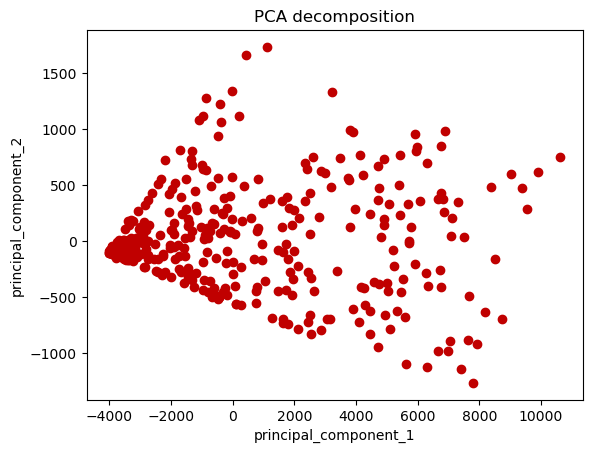

In [22]:

plt.scatter(df_pca['principal_component_1'],df_pca['principal_component_2'], color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

In [23]:
pca_3 = PCA(n_components = 3) # Here we choose the number of components that we will keep.

X_pca_3 = pca_3.fit_transform(df)

df_pca_3 = pd.DataFrame(X_pca_3, columns = ['principal_component_1','principal_component_2','principal_component_3'])


In [24]:
import plotly.express as px


In [25]:
fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
fig.show()

In [26]:
df = data.loc[:, list1].values

X_pca = pca.fit_transform(df)

data_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])
data_pca

principal_component_1  principal_component_2
0              -2661.835333              54.246176
1              -2980.273348            -130.242760
2              -3294.660995             -46.222387
3              -1772.256007             -67.441212
4              -3401.959383            -114.154185
...                     ...                    ...
7038           -2274.593593             168.204679
7039            -883.610774            -177.712271
7040           -3635.449953             -74.745822
7041            2814.871420            -773.594650
7042            1411.219181            -705.939422

[7043 rows x 2 columns]

In [27]:
data_pca= pd.concat([data,data_pca],axis=1)

data_pca

Gender  Age Married  Number of Dependents          City  \
0     Female   37     Yes                     0  Frazier Park   
1       Male   46      No                     0      Glendale   
2       Male   50      No                     0    Costa Mesa   
3       Male   78     Yes                     0      Martinez   
4     Female   75     Yes                     0     Camarillo   
...      ...  ...     ...                   ...           ...   
7038  Female   20      No                     0       La Mesa   
7039    Male   40     Yes                     0     Riverbank   
7040    Male   22      No                     0           Elk   
7041    Male   21     Yes                     0  Solana Beach   
7042    Male   36     Yes                     0   Sierra City   

      Number of Referrals  Tenure in Months    Offer Phone Service  \
0                       2                 9     None           Yes   
1                       0                 9     None           Yes   
2                       0                 4  Offer E           Yes   
3                       1                13  Offer D           Yes   
4                       3                 3     None           Yes   
...                   ...               ...      ...           ...   
7038                    0                13  Offer D           Yes   
7039                    1                22  Offer D           Yes   
7040                    0                 2  Offer E           Yes   
7041                    5                67  Offer A           Yes   
7042                    1                63     None            No   

      Avg Monthly Long Distance Charges    Multiple Lines Internet Service  \
0                                 42.39                No              Yes   
1                                 10.69               Yes              Yes   
2                                 33.65                No              Yes   
3                                 27.82                No              Yes   
4                                  7.38                No              Yes   
...                                 ...               ...              ...   
7038                              46.68                No              Yes   
7039                              16.20               Yes              Yes   
7040                              18.62                No              Yes   
7041                               2.12                No              Yes   
7042                               0.00  NO phone Service              Yes   

     Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0            Cable                     16.0              No           Yes   
1            Cable                     10.0              No            No   
2      Fiber Optic                     30.0              No            No   
3      Fiber Optic                      4.0              No           Yes   
4      Fiber Optic                     11.0              No            No   
...            ...                      ...             ...           ...   
7038           DSL                     59.0             Yes            No   
7039   Fiber Optic                     17.0              No            No   
7040           DSL                     51.0              No           Yes   
7041         Cable                     58.0             Yes            No   
7042         Cable                      5.0             Yes           Yes   

     Device Protection Plan Premium Tech Support Streaming TV  \
0                        No                  Yes          Yes   
1                        No                   No           No   
2                       Yes                   No           No   
3                       Yes                   No          Yes   
4                        No                  Yes          Yes   
...                     ...                  ...          ...   
7038                     No                  Yes           No   
70

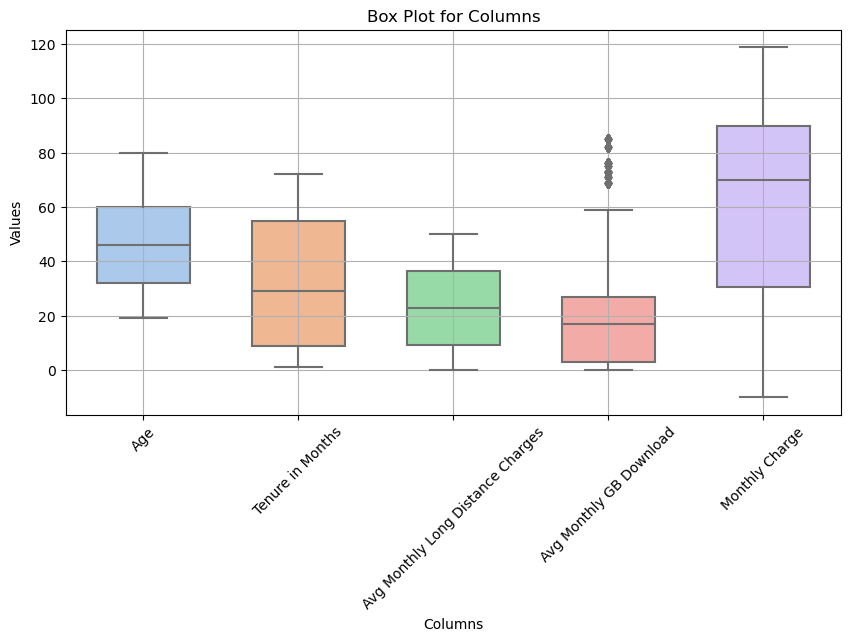

In [28]:

columns_to_plot1=["Age","Tenure in Months","Avg Monthly Long Distance Charges",
                  "Avg Monthly GB Download","Monthly Charge"]


plt.figure(figsize=(10, 5))  # Optional: Adjust the figure size
sns.boxplot(data=data[columns_to_plot1], width=0.6, palette='pastel')
plt.title('Box Plot for Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


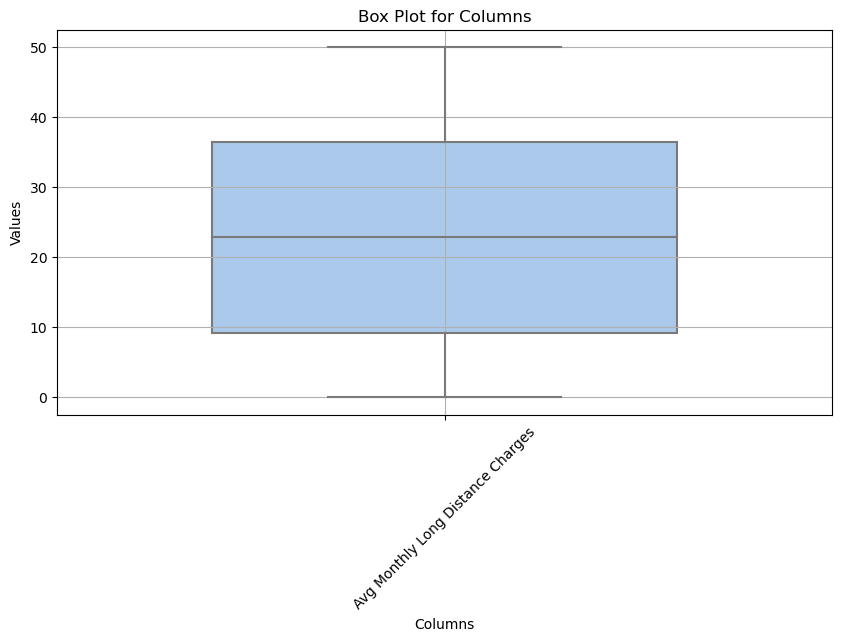

In [29]:
columns_to_plot3=["Avg Monthly Long Distance Charges"]
plt.figure(figsize=(10, 5))  # Optional: Adjust the figure size
sns.boxplot(data=data[columns_to_plot3], width=0.6, palette='pastel')
plt.title('Box Plot for Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

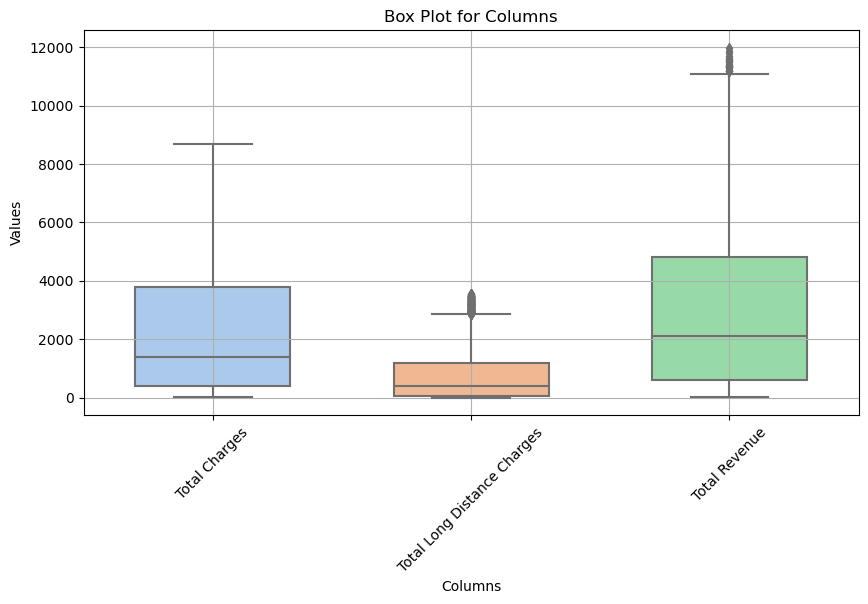

In [30]:
columns_to_plot2=["Total Charges","Total Long Distance Charges","Total Revenue"]
plt.figure(figsize=(10, 5))  # Optional: Adjust the figure size
sns.boxplot(data=data[columns_to_plot2], width=0.6, palette='pastel')
plt.title('Box Plot for Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [31]:
data = data[data['Monthly Charge'] >= 0]
data_pca=data_pca[data_pca['Monthly Charge'] >= 0]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6923 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6923 non-null   object 
 1   Age                                6923 non-null   int64  
 2   Married                            6923 non-null   object 
 3   Number of Dependents               6923 non-null   int64  
 4   City                               6923 non-null   object 
 5   Number of Referrals                6923 non-null   int64  
 6   Tenure in Months                   6923 non-null   int64  
 7   Offer                              6923 non-null   object 
 8   Phone Service                      6923 non-null   object 
 9   Avg Monthly Long Distance Charges  6923 non-null   float64
 10  Multiple Lines                     6923 non-null   object 
 11  Internet Service                   6923 non-null   objec

analyse


<AxesSubplot:>

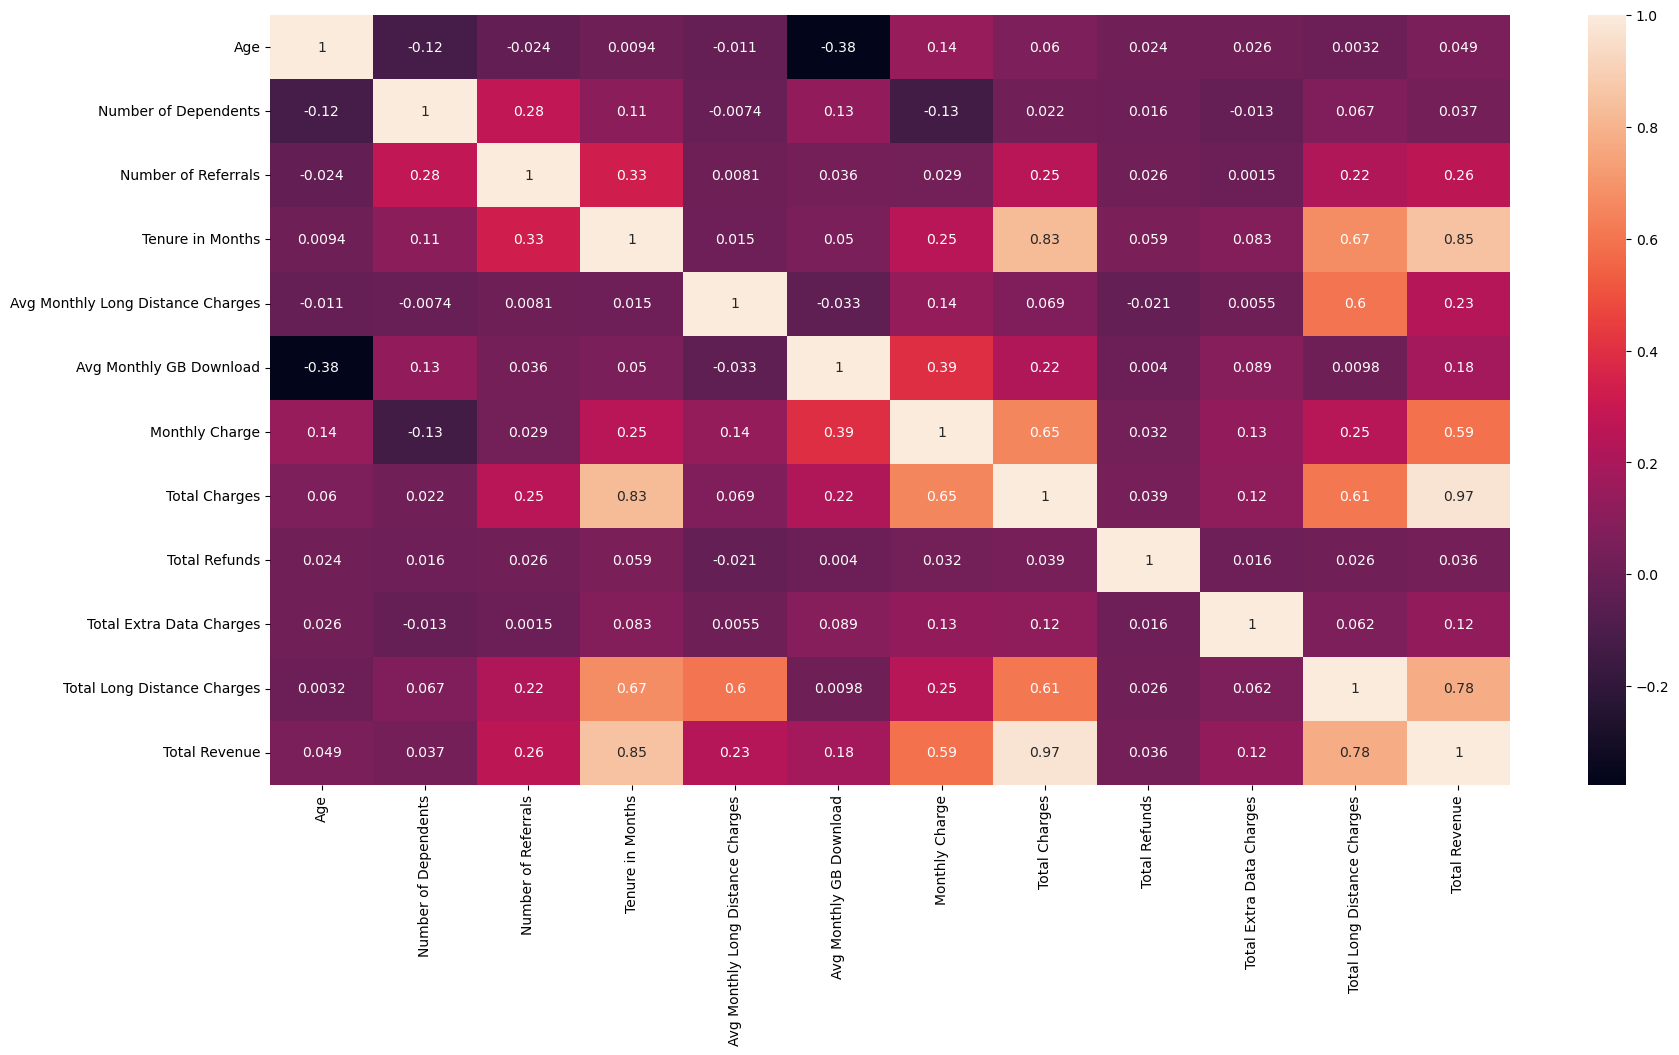

In [33]:
df = data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(df, annot = True)

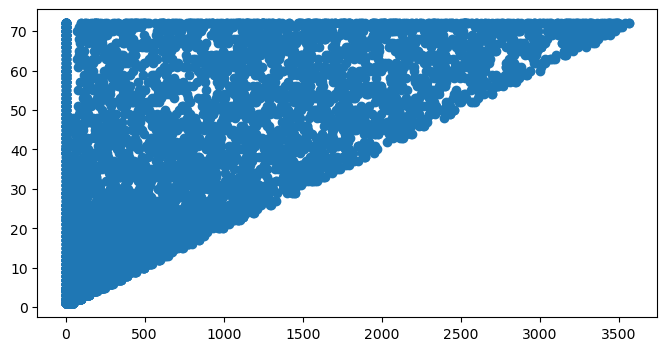

In [34]:
plt.figure(figsize=(8, 4))
plt.scatter("Total Long Distance Charges","Tenure in Months",data=data)
plt.show()

In [35]:
a=data["Total Charges"].iloc[:100]
a

0       593.30
2       280.85
3      1237.85
4       267.40
5       571.45
        ...   
97     1564.40
98     1847.55
99     3694.70
100      58.00
101    4017.45
Name: Total Charges, Length: 100, dtype: float64

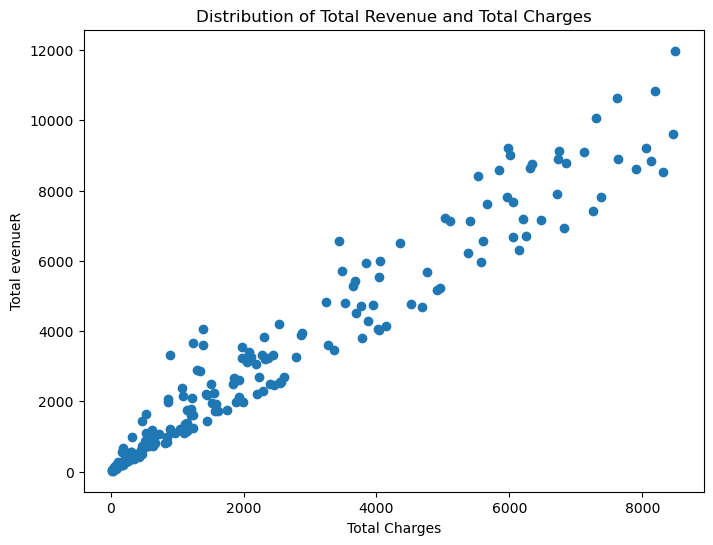

In [36]:

a=data["Total Charges"].iloc[:200]
b=data["Total Revenue"].iloc[:200]
plt.figure(figsize=(8, 6))
plt.scatter(a,b)
plt.xlabel('Total Charges')
plt.ylabel('Total evenueR')
plt.title('Distribution of Total Revenue and Total Charges')
plt.show()

In [37]:
bins = [-1,20.5,85]
labels = ['1-AVG','avg+' ]
data.loc[:,'GB Range'] = pd.cut(data.loc[:,'Avg Monthly GB Download'], bins=bins, labels=labels)

<AxesSubplot:xlabel='GB Range', ylabel='count'>

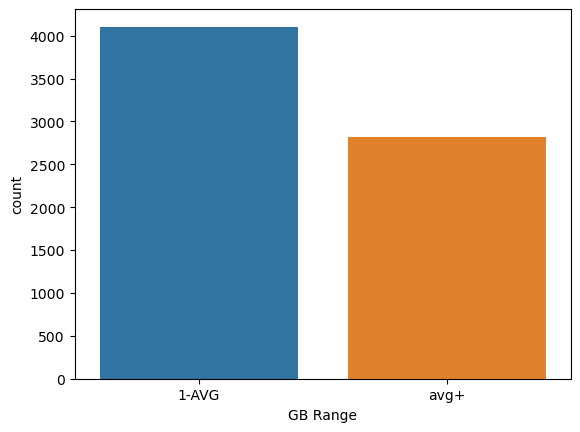

In [38]:
sns.countplot(x="GB Range",data=data)

In [39]:
bins = [1, 24,34, 44, 54, 64, 100]   # 
labels = ['18-24', '25-34', '35-44', '45-54', '55-64','65+'] # 
data.loc[:,'Age Range'] = pd.cut(data.loc[:,'Age'], bins=bins, labels=labels)

In [40]:
binst = [0, 12, 24, 36,48,60,72,84] 
labelst = ['1', '2', '3', '4','5','6','7+'] 
data.loc[:,'Tenure in Months by Year'] = pd.cut(data.loc[:,'Tenure in Months'], bins=binst, labels=labelst)

In [41]:
churned = data[data['Customer Status'] != 'Joined']

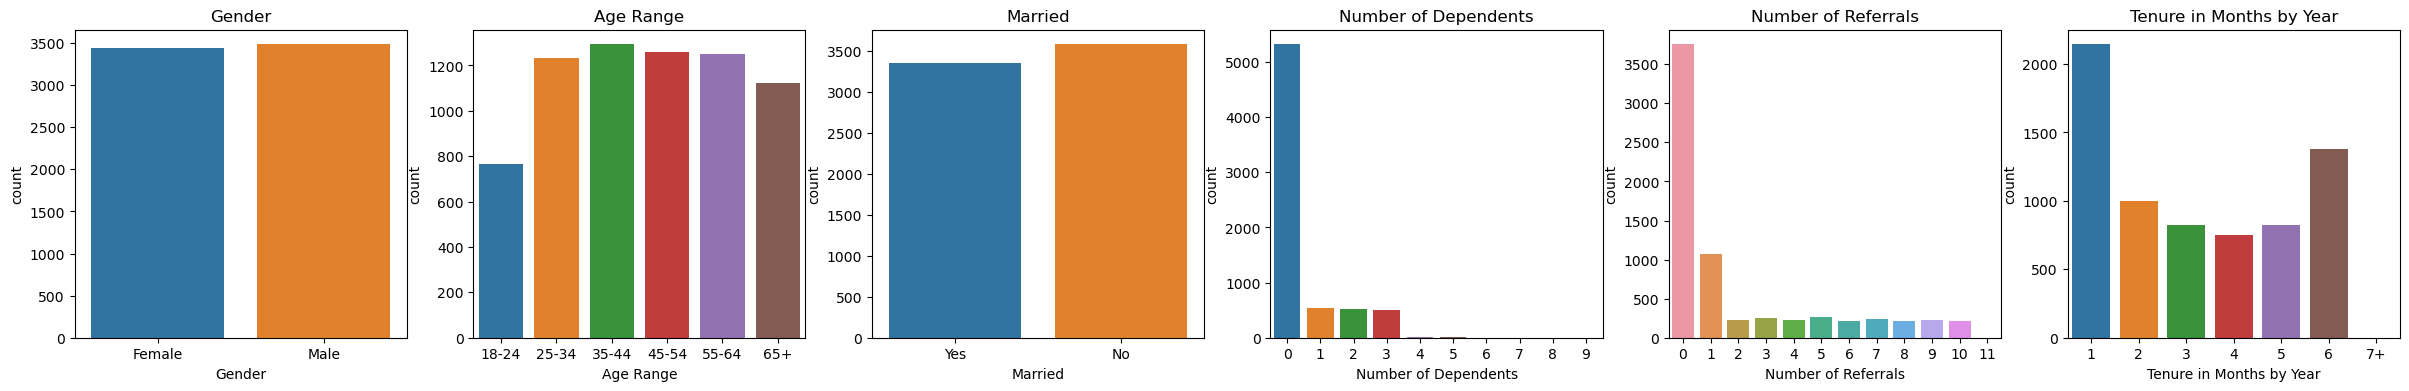

In [42]:
demo_col = ['Gender','Age Range','Married','Number of Dependents','Number of Referrals','Tenure in Months by Year']
numerical = demo_col

plt.figure(figsize=(30,4))

for i, cols1 in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(cols1), data=data)
    ax.set_title(f"{cols1}")

<AxesSubplot:xlabel='Number of Dependents', ylabel='count'>

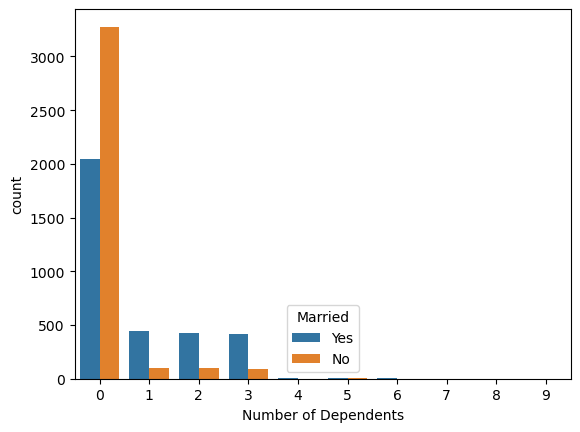

In [43]:
sns.countplot(x ='Number of Dependents', hue = str("Married"), data = data)

In [44]:
data_int_type=data.groupby("Internet Type").mean()
data_int_type["Count"]=data["Internet Type"].value_counts()
data_int_type["Int Type"]=data_int_type.index
data_int_type


Age  Number of Dependents  Number of Referrals  \
Internet Type                                                         
Cable          44.649144              0.486553             1.984108   
DSL            44.850340              0.480519             2.075448   
Fiber Optic    49.770080              0.315930             1.761714   
No Internet    42.721333              0.750000             2.174667   

               Tenure in Months  Avg Monthly Long Distance Charges  \
Internet Type                                                        
Cable                 32.012225                          19.058790   
DSL                   32.888683                          18.258293   
Fiber Optic           33.227242                          25.537517   
No Internet           30.585333                          24.988300   

               Avg Monthly GB Download  Monthly Charge  Total Charges  \
Internet Type                                                           
Cable                        27.931540       60.321455    2087.866687   
DSL                          27.442177       58.147310    2126.977706   
Fiber Optic                  25.040830       91.558082    3237.834806   
No Internet                   0.000000       21.076567     663.609460   

               Total Refunds  Total Extra Data Charges  \
Internet Type                                            
Cable               1.648521                  7.738386   
DSL                 2.001664                  9.393939   
Fiber Optic         2.130117                  8.718206   
No Internet         1.658987                  0.000000   

               Total Long Distance Charges  Total Revenue  Count     Int Type  
Internet Type                                                                  
Cable                           598.170929    2692.127482    818        Cable  
DSL                             614.887044    2749.257025   1617          DSL  
Fiber Optic                     854.135315    4098.558210   2988  Fiber Optic  
No Internet                     771.154500    1433.104973   1500  No Internet

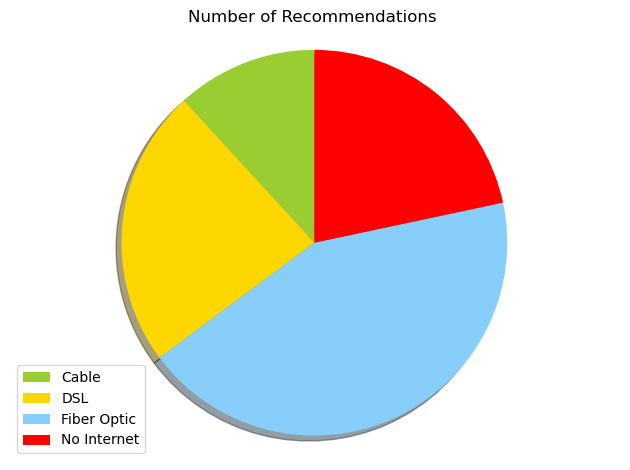

In [45]:
colors = ['yellowgreen', 'gold', 'lightskyblue',"red"]
patches, texts = plt.pie(data_int_type["Count"], colors=colors, shadow=True, startangle=90)

plt.legend(patches, data_int_type["Int Type"], loc="best")

plt.title("Number of Recommendations ")
plt.axis('equal')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Number of Dependents', ylabel='count'>

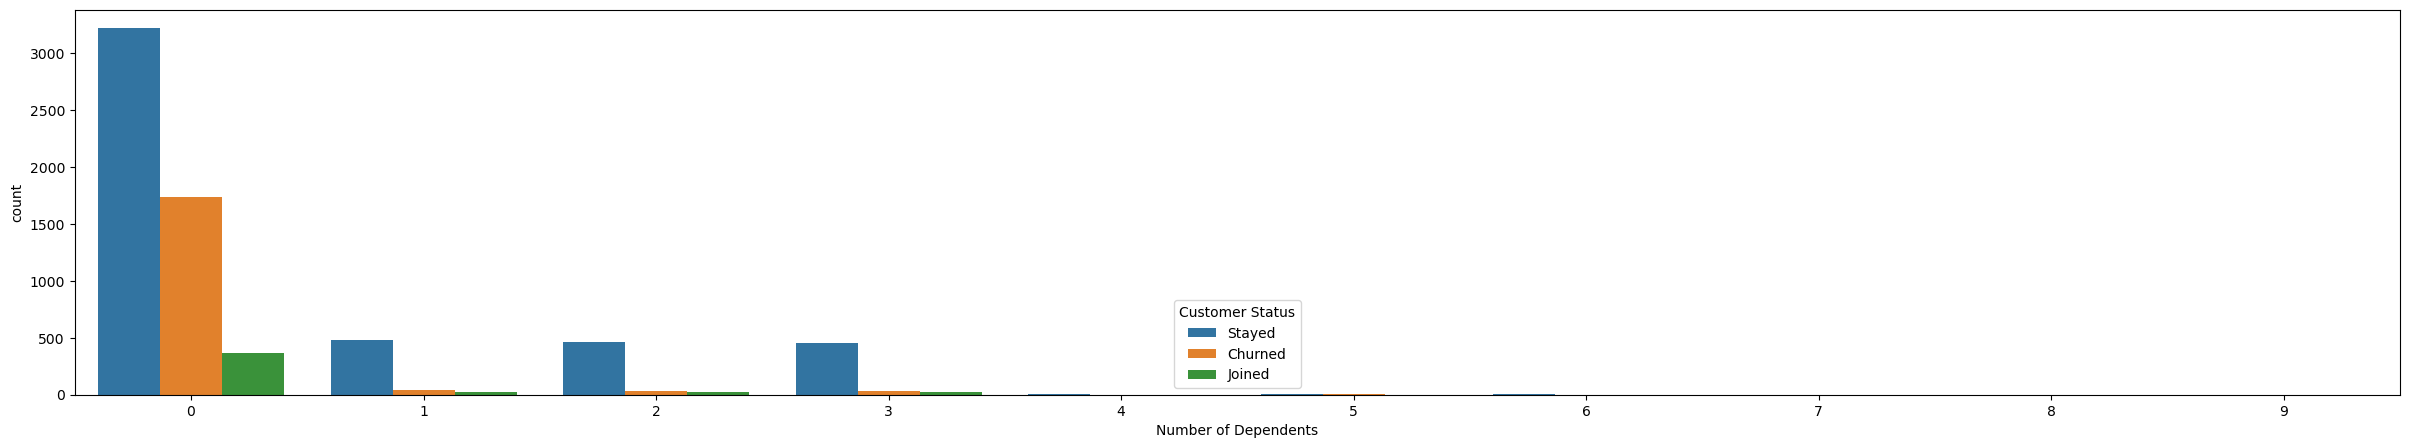

In [46]:
plt.figure(figsize=(30,5))
sns.countplot(x ='Number of Dependents', hue = str("Customer Status"), data = data)


<AxesSubplot:xlabel='Number of Dependents', ylabel='Total Long Distance Charges'>

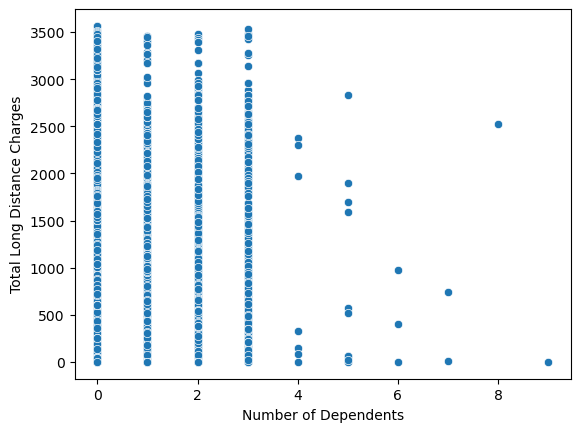

In [47]:
sns.scatterplot(y='Total Long Distance Charges', x='Number of Dependents', data=data)

#### churn rate

In [48]:
churn_by_gender = data.groupby('Gender')['Customer Status']
descriptive_stats_by_gender = churn_by_gender.describe()
print(descriptive_stats_by_gender)


       count unique     top  freq
Gender                           
Female  3439      3  Stayed  2307
Male    3484      3  Stayed  2329


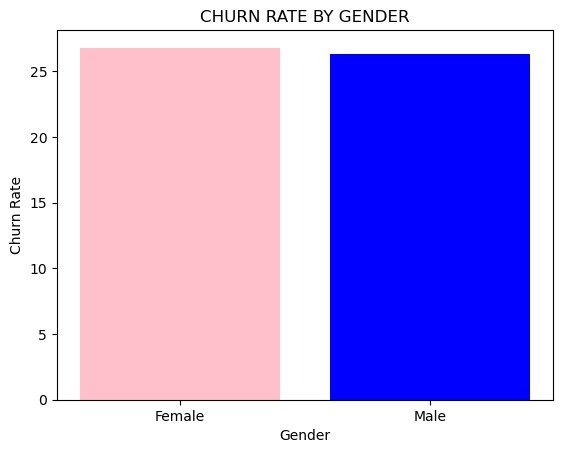

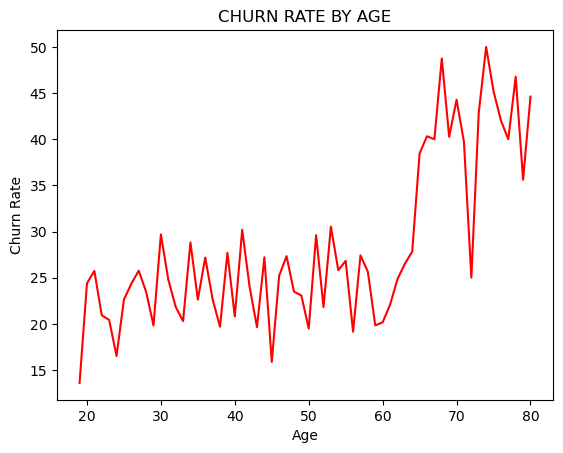

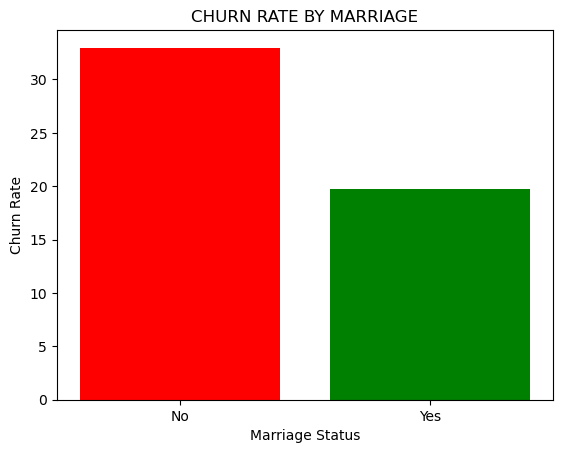

In [49]:
churn_by_gender = data.groupby('Gender')['Customer Status'].apply(lambda x: (x == 'Churned').mean()*100)
churn_by_age = data.groupby('Age')['Customer Status'].apply(lambda x: (x == 'Churned').mean() * 100)
churn_by_marriage = data.groupby('Married')['Customer Status'].apply(lambda x: (x == 'Churned').mean()*100)


# Visualize the churn_by_gender
plt.bar(churn_by_gender.index, churn_by_gender, color=["pink", "blue"])
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY GENDER')
plt.show()

# Visualize the churn_by_age
plt.plot(churn_by_age.index, churn_by_age, color="red")
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY AGE')
plt.show()

#Visualize the churn rate according to marriage status
plt.bar(churn_by_marriage.index, churn_by_marriage, color=["red", "green"])
plt.xlabel('Marriage Status')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY MARRIAGE')
plt.show()

#### age

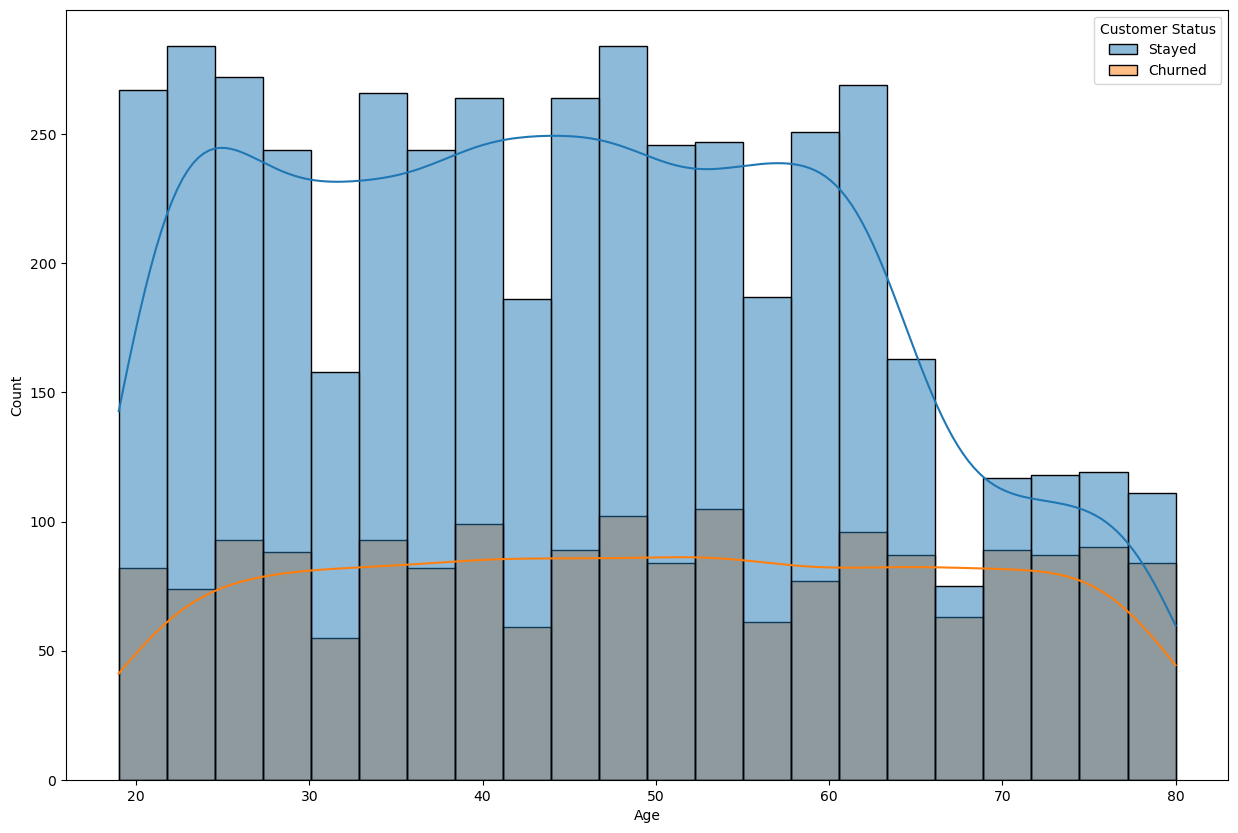

In [50]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(data = churned, x = 'Age', hue = 'Customer Status',kde = True)
plt.show()
    
   

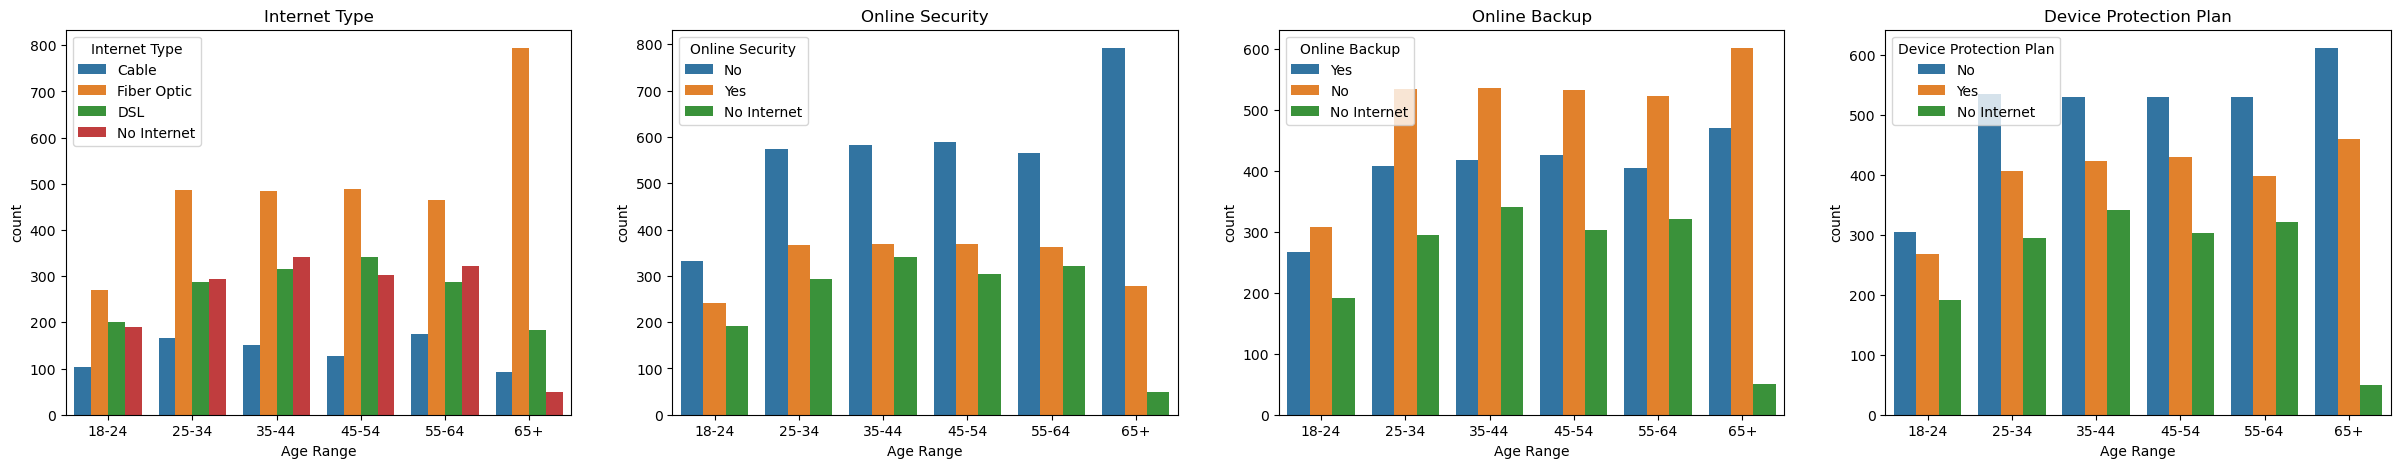

In [51]:
age_services = ['Internet Type','Online Security','Online Backup', 'Device Protection Plan']

plt.figure(figsize=(30,5))

for i, cola_s in enumerate(age_services):
    ax = plt.subplot(1, len(age_services), i+1)
    sns.countplot(x ="Age Range", hue = str(cola_s), data = data)
    ax.set_title(f"{cola_s}")

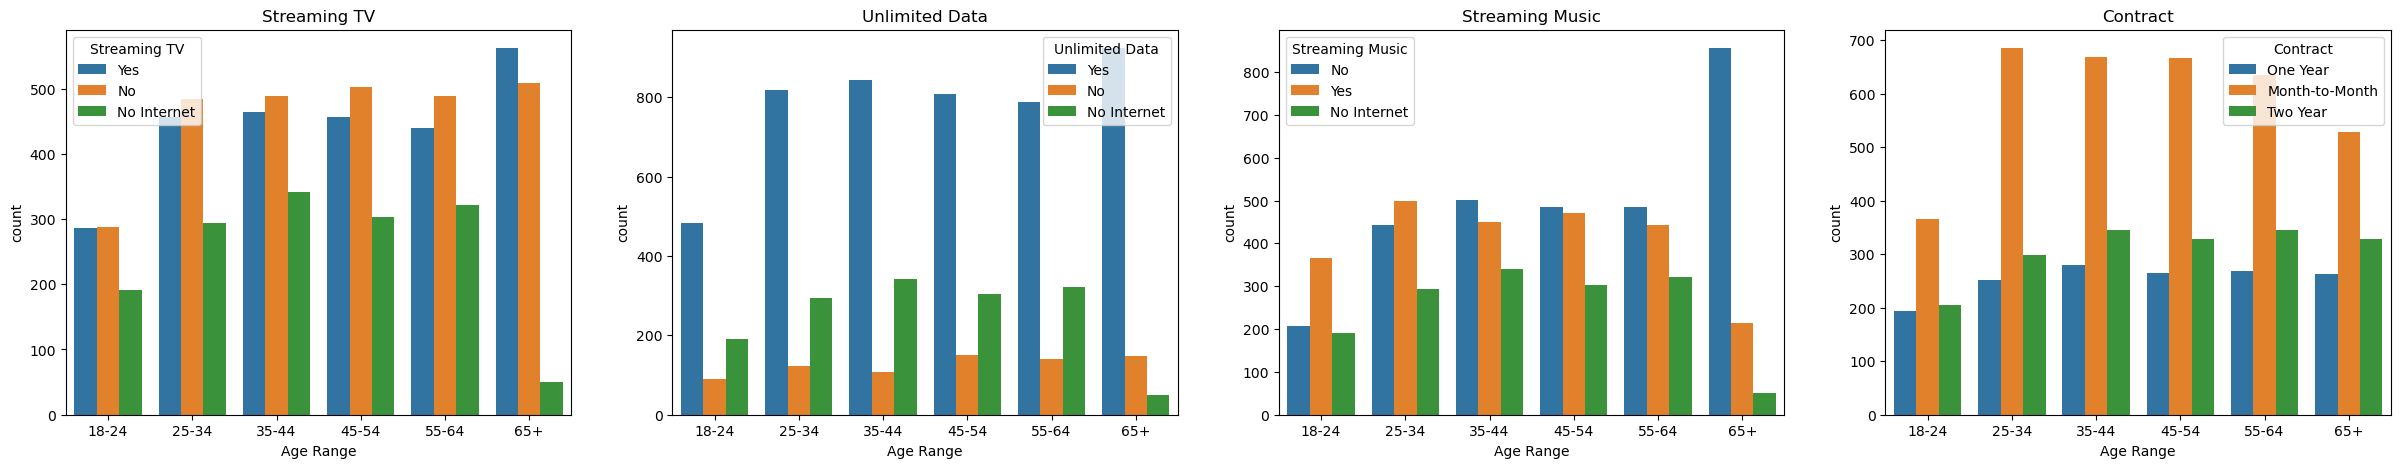

In [52]:
age_services1 = ['Streaming TV','Unlimited Data','Streaming Music','Contract']

plt.figure(figsize=(30,5))

for i, cola_s1 in enumerate(age_services1):
    ax = plt.subplot(1, len(age_services1), i+1)
    sns.countplot(x ="Age Range", hue = str(cola_s1), data = data)
    ax.set_title(f"{cola_s1}")

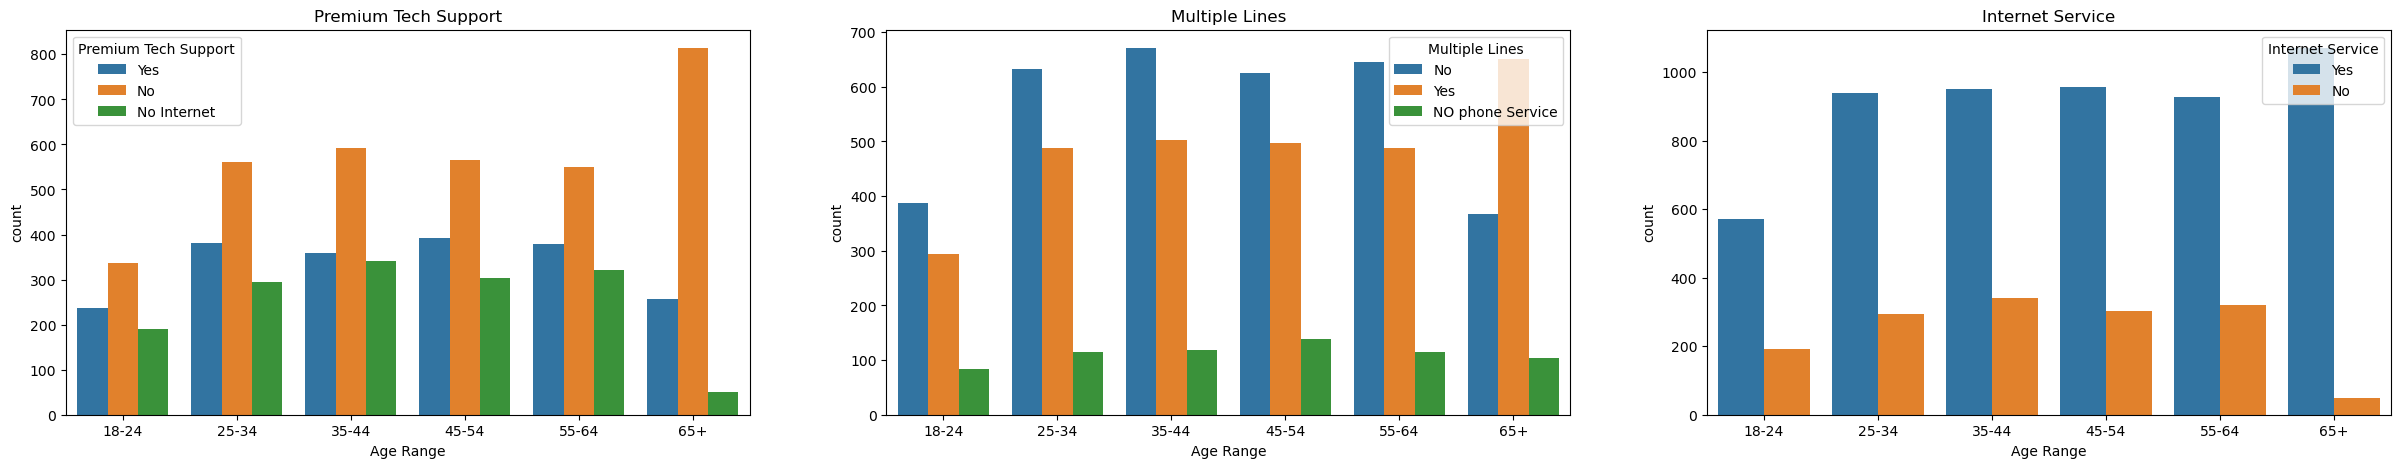

In [53]:

age_services1 = ['Premium Tech Support','Multiple Lines','Internet Service']

plt.figure(figsize=(30,5))

for i, cola_s1 in enumerate(age_services1):
    ax = plt.subplot(1, len(age_services1), i+1)
    sns.countplot(x ="Age Range", hue = str(cola_s1), data = data)
    ax.set_title(f"{cola_s1}")

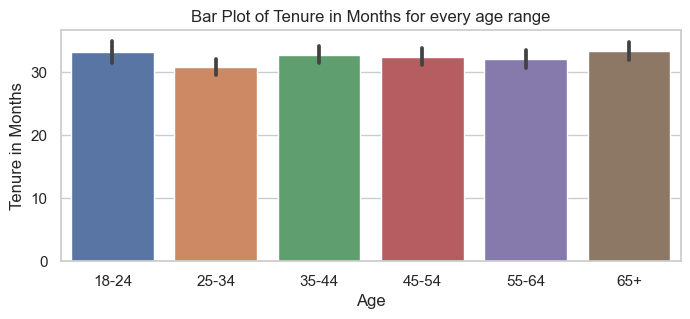

In [54]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 3))

# Create a bar plot
sns.barplot(x='Age Range', y='Tenure in Months', data=data)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Tenure in Months')
plt.title('Bar Plot of Tenure in Months for every age range')

plt.show()

In [55]:
fig = px.density_heatmap(data, x='Age', y='Total Charges')
fig.show()

#### internet type and other services 

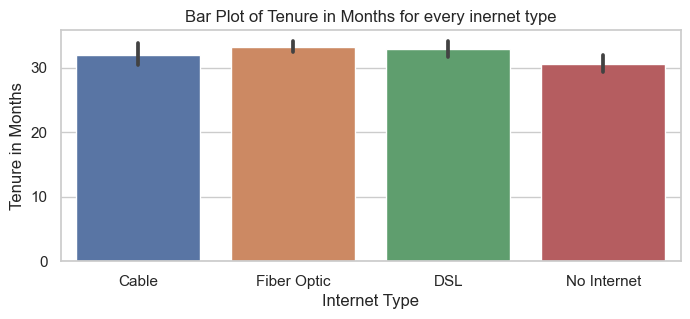

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 3))

# Create a bar plot
sns.barplot(x='Internet Type', y='Tenure in Months', data=data)

# Add labels and title
plt.xlabel('Internet Type')
plt.ylabel('Tenure in Months')
plt.title('Bar Plot of Tenure in Months for every inernet type')

plt.show()

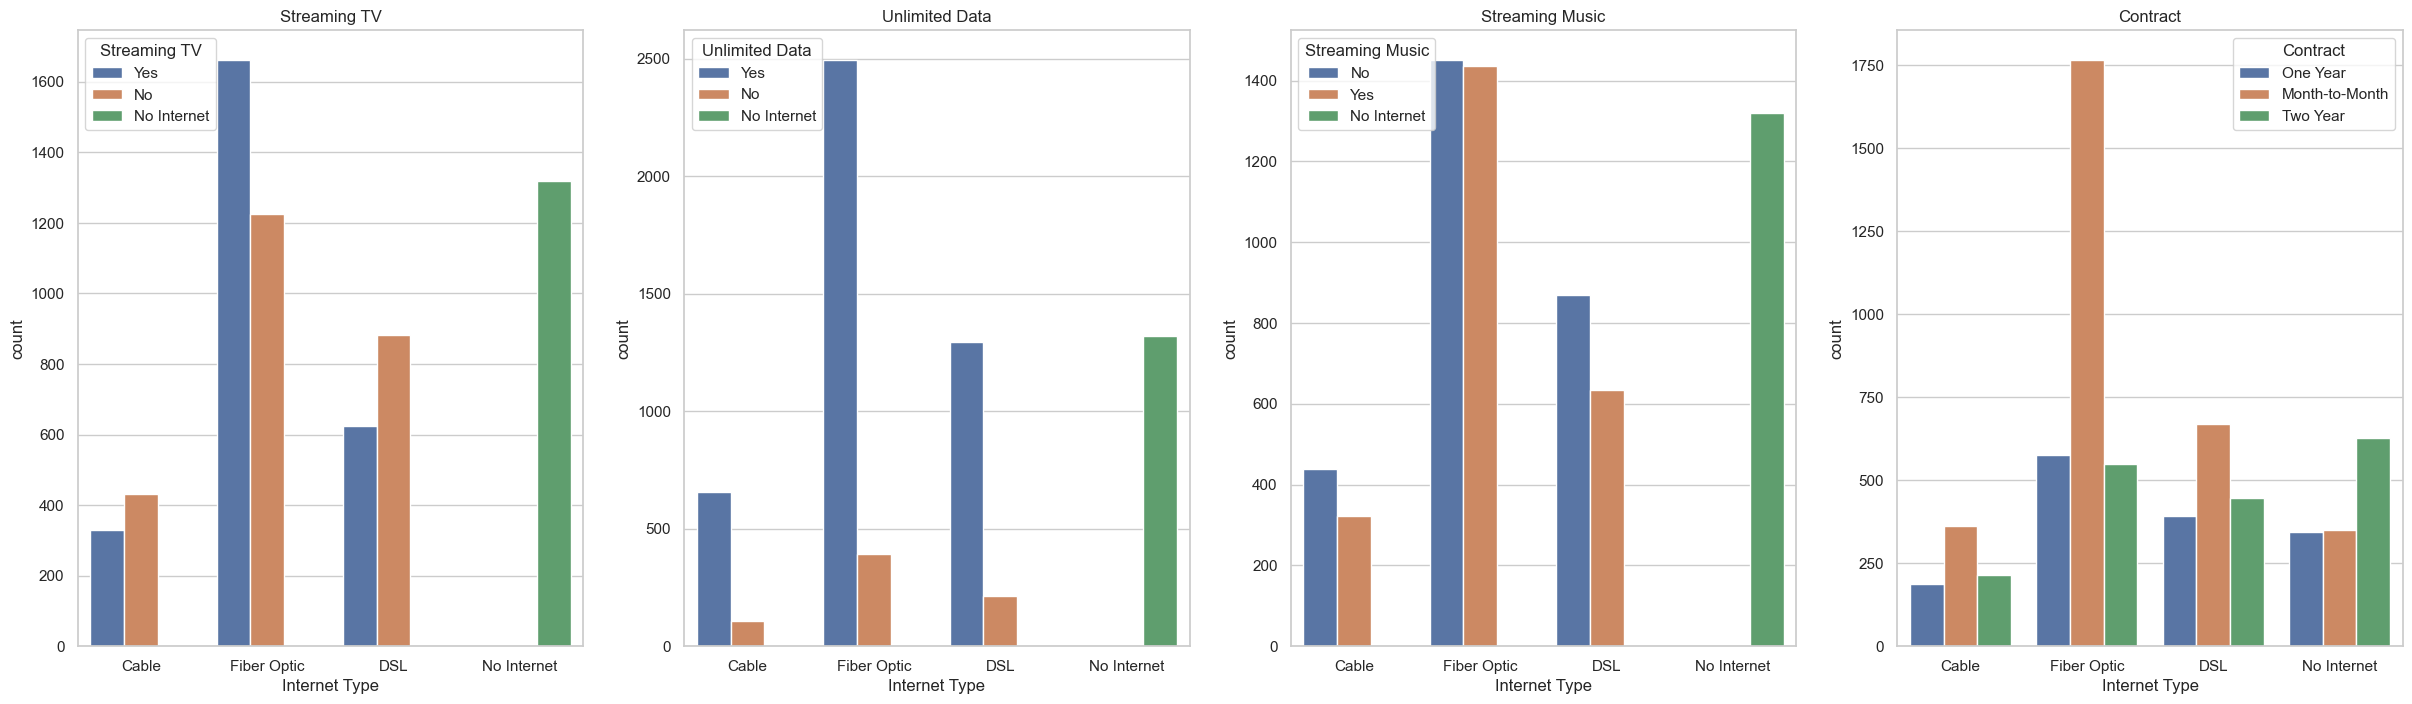

In [57]:
cat_cols_3 = ['Streaming TV','Unlimited Data','Streaming Music','Contract']

plt.figure(figsize=(30,8))

for i, col3 in enumerate(cat_cols_3):
    ax = plt.subplot(1, len(cat_cols_3), i+1)
    sns.countplot(x ="Internet Type", hue = str(col3), data = churned)
    ax.set_title(f"{col3}")

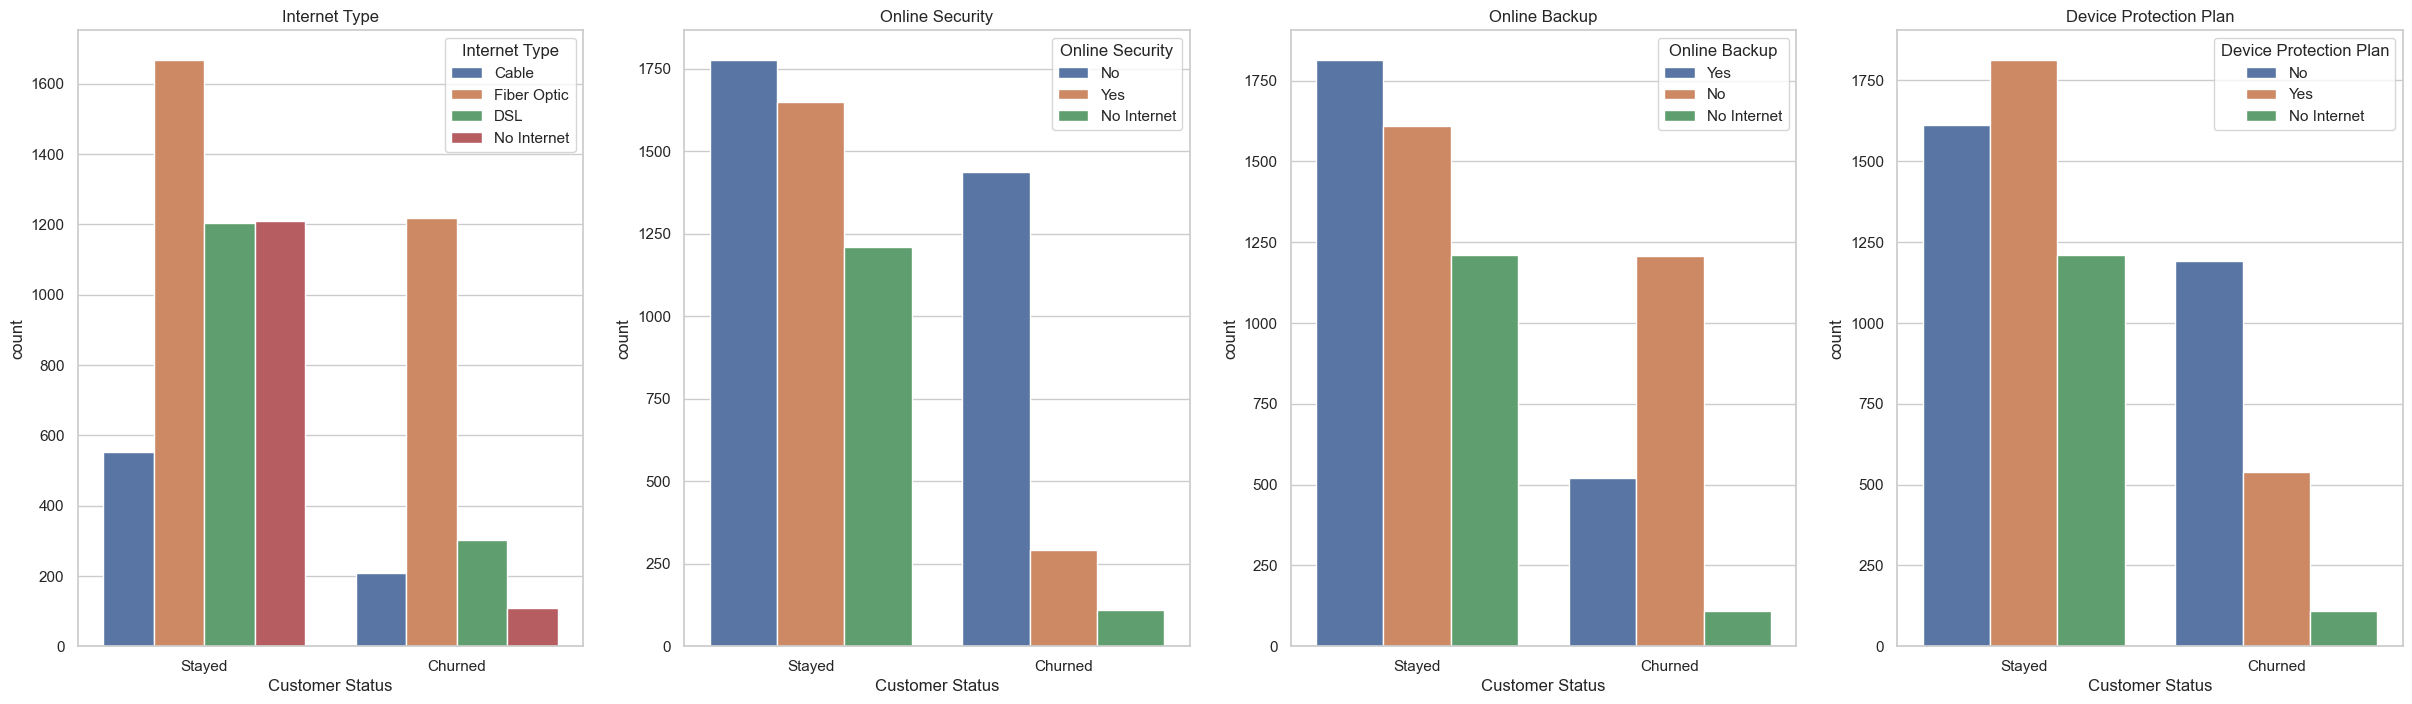

In [58]:
cat_cols = ['Internet Type','Online Security','Online Backup', 'Device Protection Plan']

plt.figure(figsize=(30,8))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(1, len(cat_cols), i+1)
    sns.countplot(x ="Customer Status", hue = str(col), data = churned)
    ax.set_title(f"{col}")
   

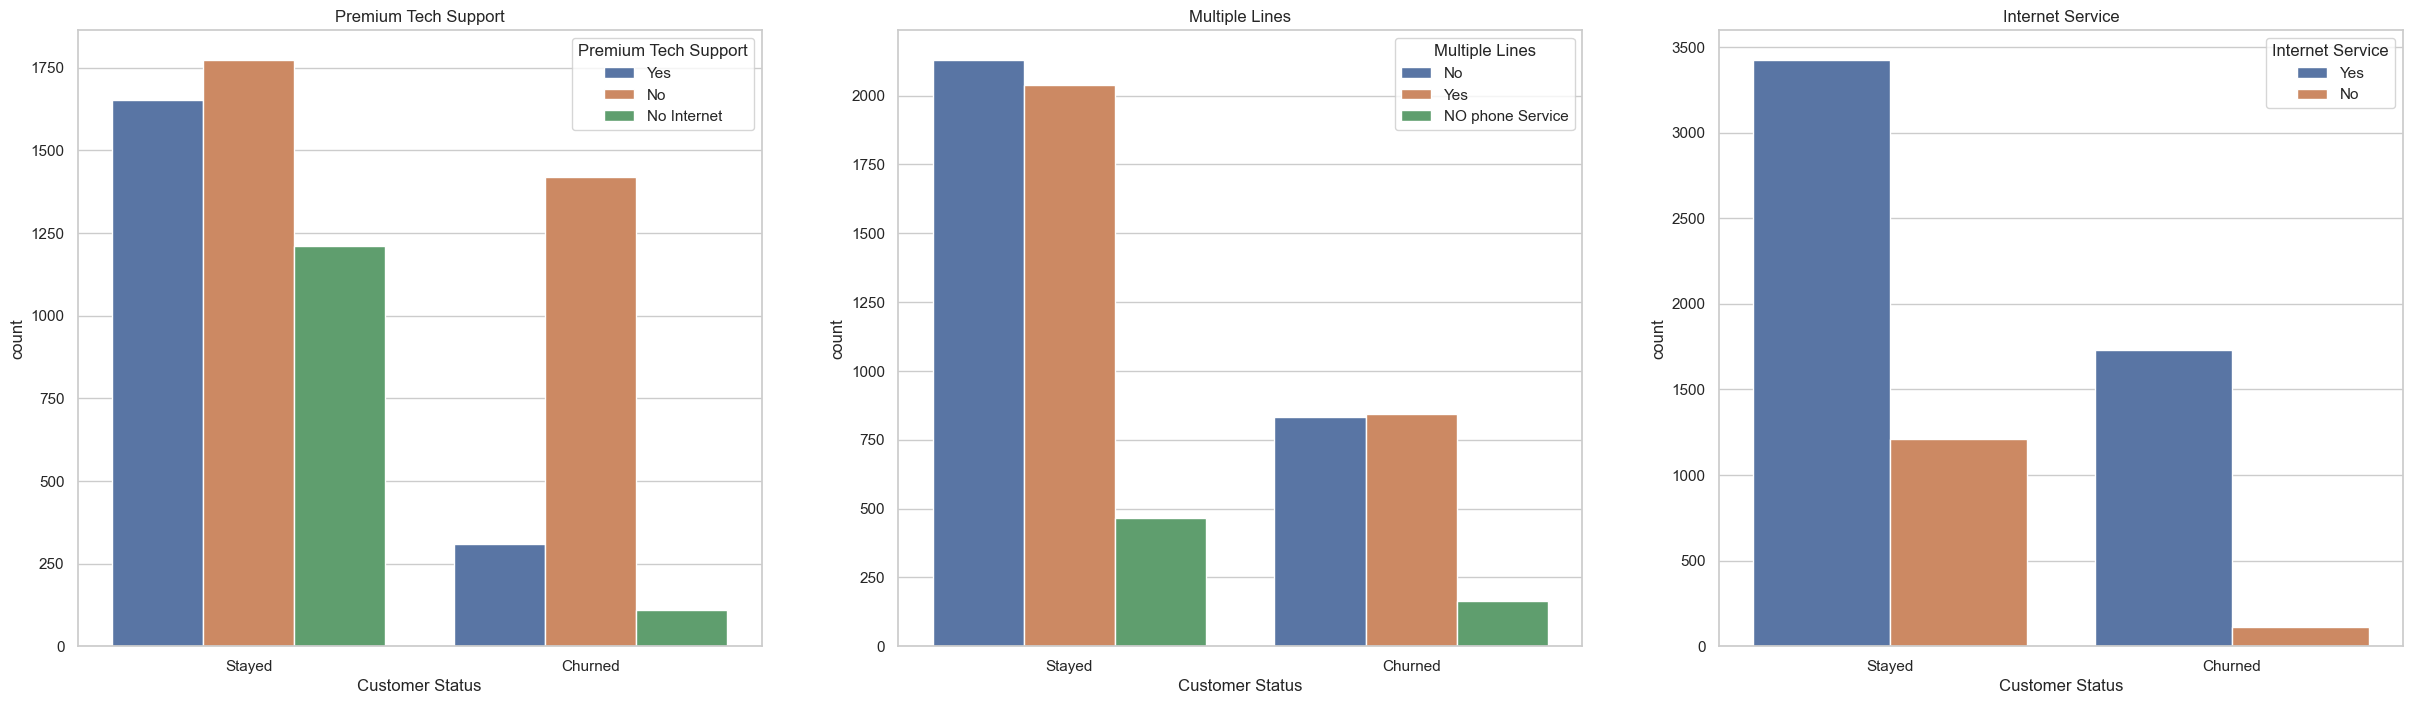

In [59]:
cat_cols_2 = ['Premium Tech Support','Multiple Lines','Internet Service']

plt.figure(figsize=(30,8))

for i, col2 in enumerate(cat_cols_2):
    ax = plt.subplot(1, len(cat_cols_2), i+1)
    sns.countplot(x ="Customer Status", hue = str(col2), data = churned)
    ax.set_title(f"{col2}")

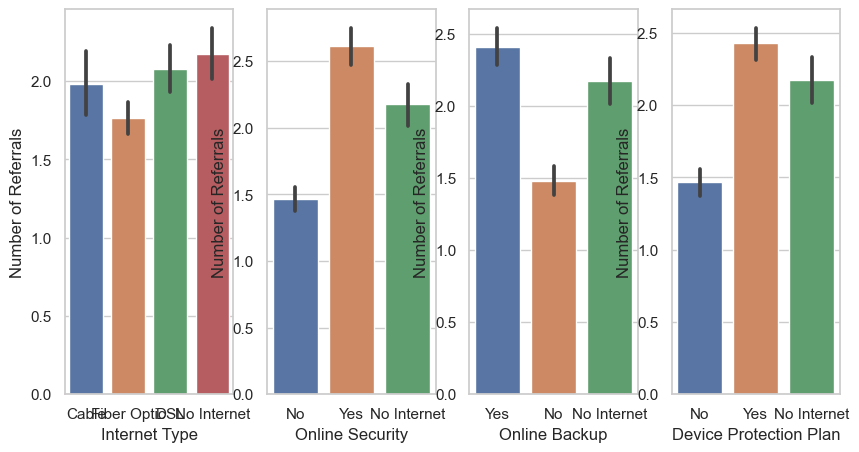

In [60]:
cat_cols_2 = ['Internet Type','Online Security','Online Backup', 'Device Protection Plan']
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Create a bar plot
for i, col2 in enumerate(cat_cols_2):
    ax = plt.subplot(1, len(cat_cols_2), i+1)
    
    
    sns.barplot(x=str(col2),y='Number of Referrals',  data=data)
    


plt.show()

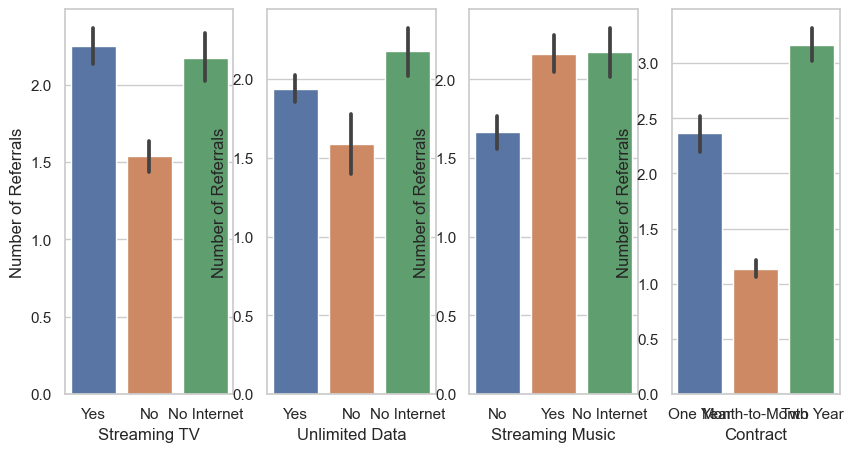

In [61]:
cat_cols_2 = ['Streaming TV','Unlimited Data','Streaming Music','Contract']
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Create a bar plot
for i, col2 in enumerate(cat_cols_2):
    ax = plt.subplot(1, len(cat_cols_2), i+1)
    
    
    sns.barplot(x=str(col2),y='Number of Referrals',  data=data)
   


plt.show()

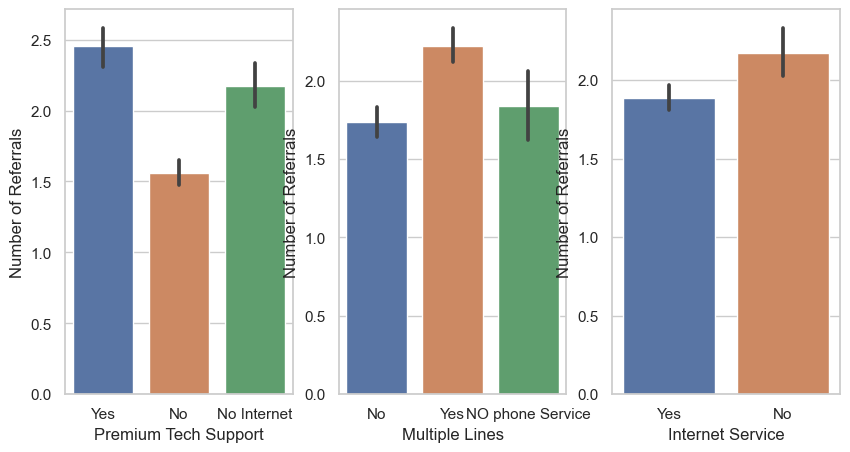

In [62]:

cat_cols_2 = ['Premium Tech Support','Multiple Lines','Internet Service']
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Create a bar plot
for i, col2 in enumerate(cat_cols_2):
    ax = plt.subplot(1, len(cat_cols_2), i+1)
    
    
    sns.barplot(x=str(col2),y='Number of Referrals',  data=data)
    


plt.show()

---------------------

#### contract

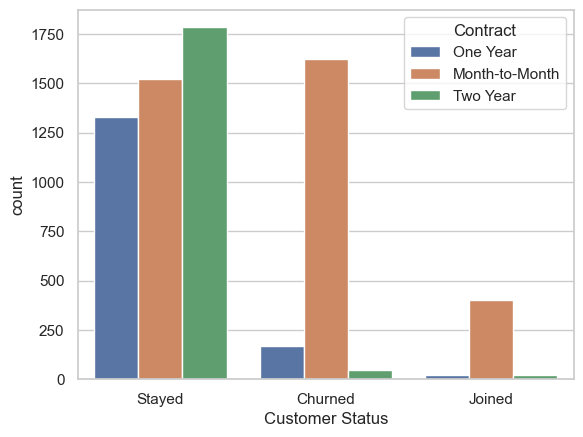

In [63]:
sns.countplot(data =data,x = 'Customer Status',hue = 'Contract')
plt.show()


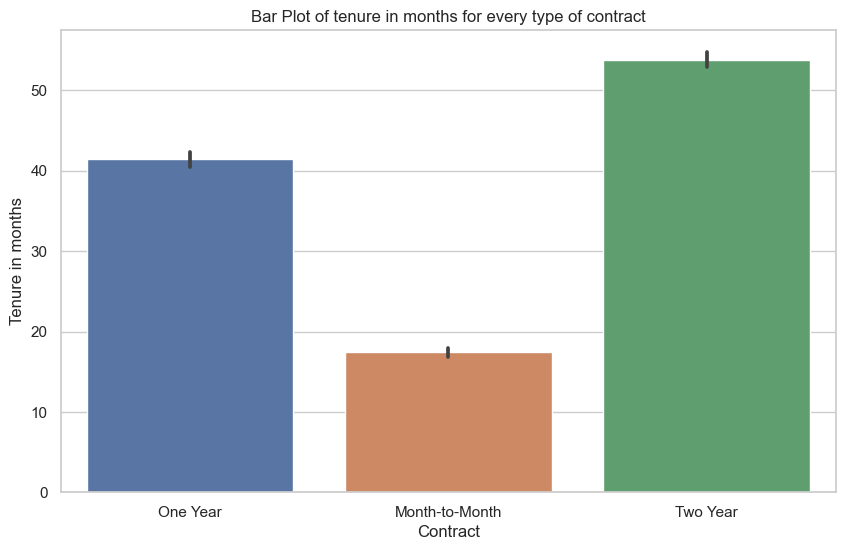

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Contract', y='Tenure in Months', data=data)

# Add labels and title
plt.xlabel('Contract')
plt.ylabel('Tenure in months')
plt.title('Bar Plot of tenure in months for every type of contract')

plt.show()
    

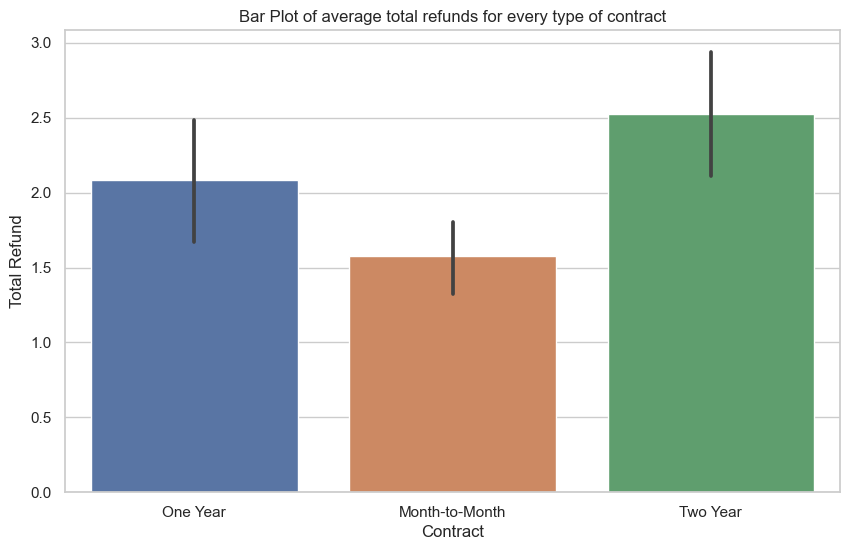

In [65]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Contract', y='Total Refunds', data=data)

# Add labels and title
plt.xlabel('Contract')
plt.ylabel('Total Refund')
plt.title('Bar Plot of average total refunds for every type of contract')

plt.show()
    

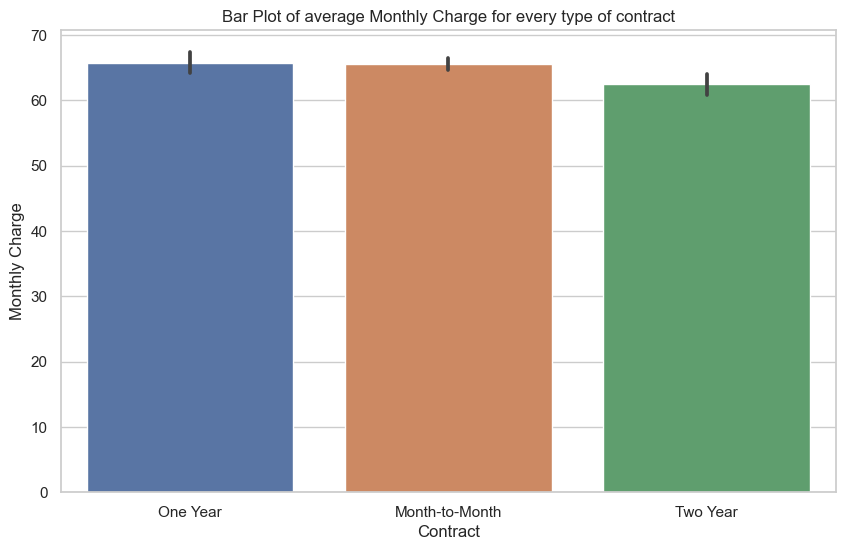

In [66]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Contract', y='Monthly Charge', data=data)

# Add labels and title
plt.xlabel('Contract')
plt.ylabel('Monthly Charge')
plt.title('Bar Plot of average Monthly Charge for every type of contract')

plt.show()

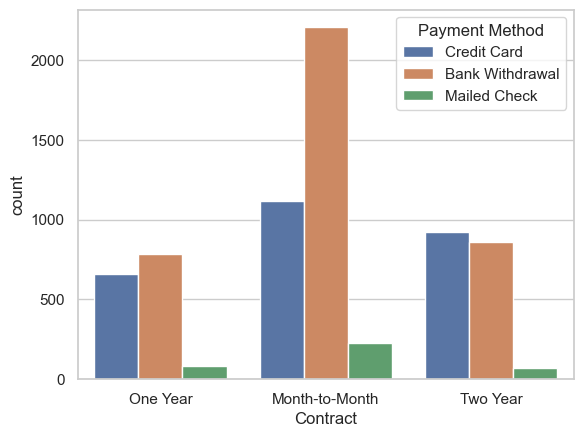

In [67]:
sns.countplot(data =data,x = 'Contract',hue = 'Payment Method')
plt.show()

#### offer


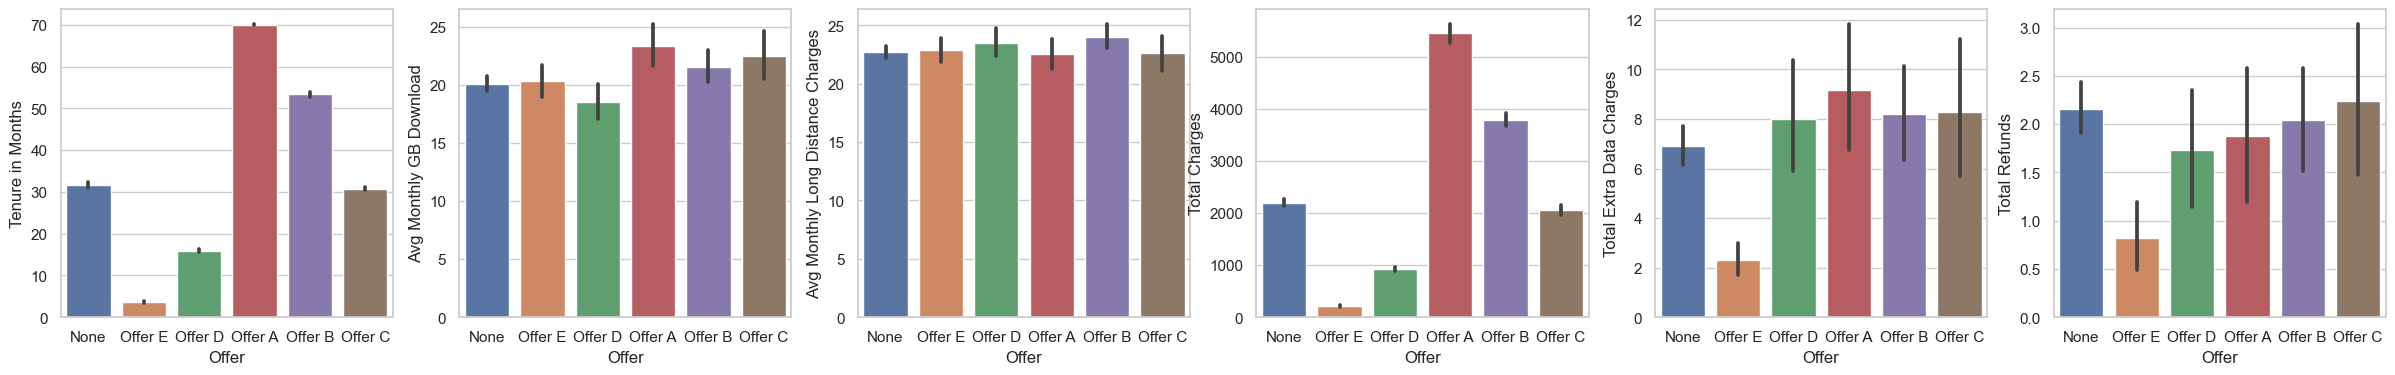

In [68]:

cat_cols_4 = ['Tenure in Months','Avg Monthly GB Download','Avg Monthly Long Distance Charges','Total Charges','Total Extra Data Charges'
             ,'Total Refunds']


plt.figure(figsize=(30,4))

for i, col4 in enumerate(cat_cols_4):
    ax = plt.subplot(1, len(cat_cols_4), i+1)
    # Create a bar plot
    sns.barplot(x='Offer', y=str(col4), data=data)


    

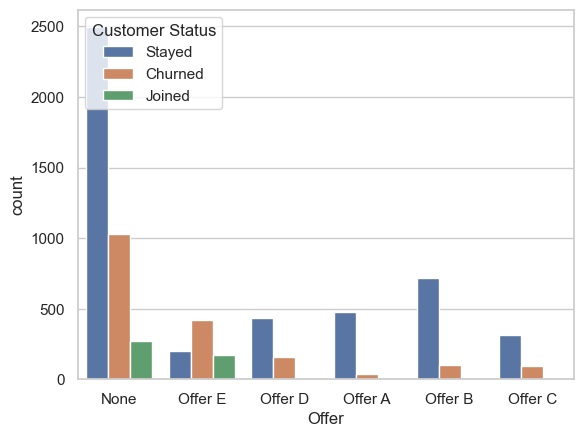

In [69]:
sns.countplot(data =data,x = 'Offer',hue = 'Customer Status')
plt.show()



<AxesSubplot:xlabel='Offer', ylabel='count'>

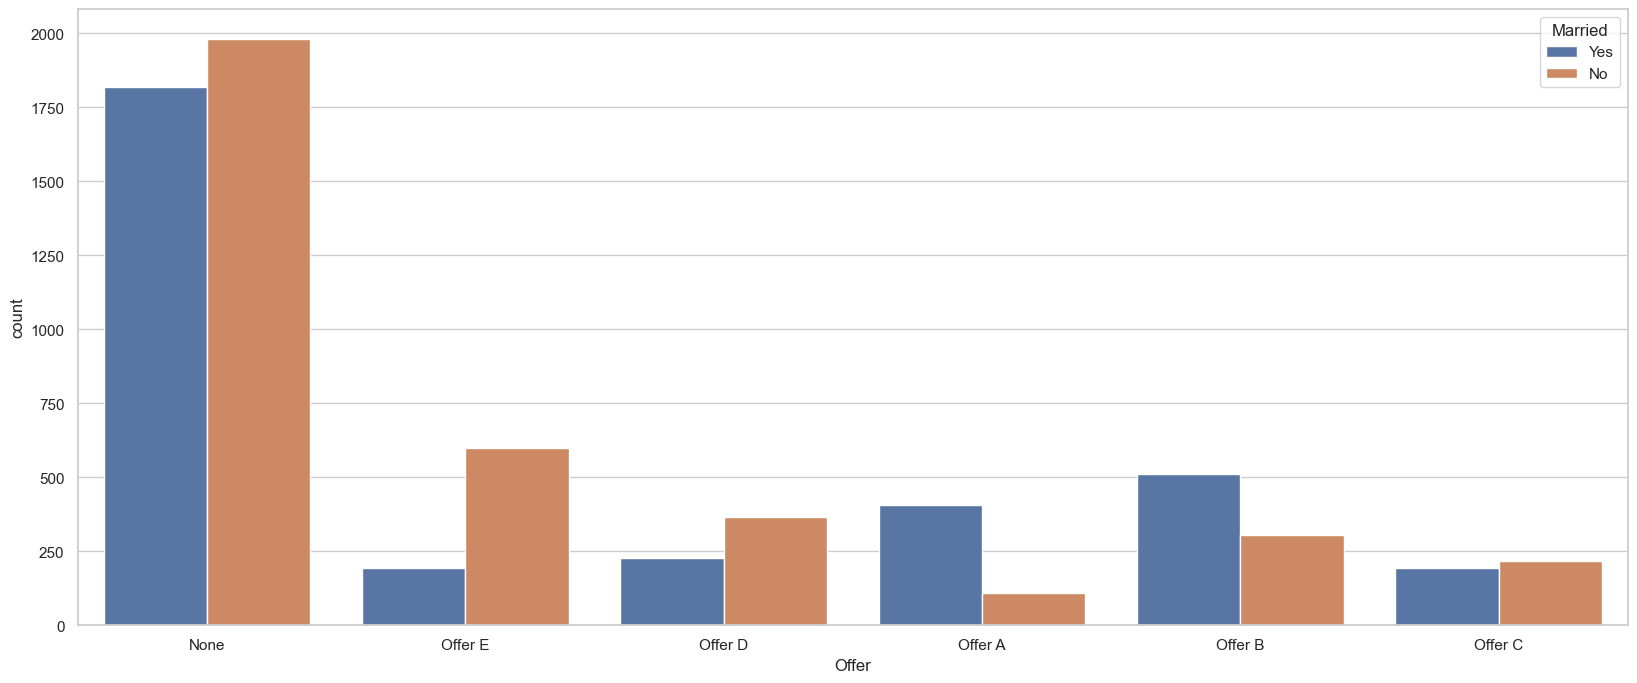

In [70]:
plt.figure(figsize=(20,8))
sns.countplot(x ="Offer", hue = str('Married'), data = data)
   

<AxesSubplot:xlabel='Age Range', ylabel='count'>

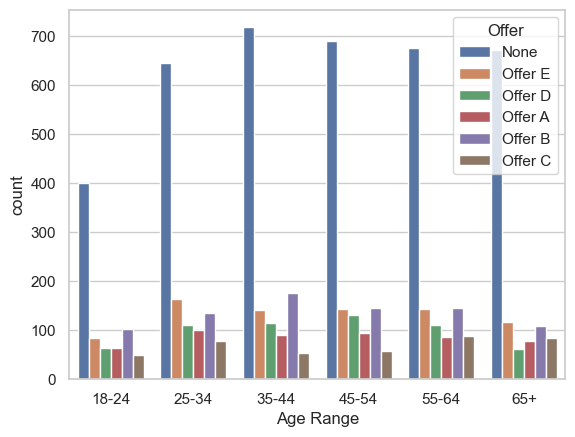

In [71]:
sns.countplot(x ="Age Range", hue = str('Offer'), data = data)

#### city

In [72]:
df_top_ten=data.groupby("City").sum().sort_values("Total Revenue",ascending=False).head(10)
df_top_ten["City"]=df_top_ten.index

df_top_ten

Age  Number of Dependents  Number of Referrals  \
City                                                              
Los Angeles    13079                   118                  647   
San Diego      13443                    64                  332   
Sacramento      5133                    44                  213   
San Jose        4862                    69                  250   
San Francisco   4798                    56                  148   
Fresno          2811                    16                   72   
Long Beach      2615                    32                  158   
Escondido       2387                    25                   75   
Oakland         2409                    15                   70   
Whittier        1419                    15                   77   

               Tenure in Months  Avg Monthly Long Distance Charges  \
City                                                                 
Los Angeles                9067                            6326.64   
San Diego                  7078                            6080.10   
Sacramento                 3757                            2825.97   
San Jose                   3520                            2581.82   
San Francisco              3146                            2708.06   
Fresno                     2243                            1250.99   
Long Beach                 1929                            1269.88   
Escondido                  1565                            1232.61   
Oakland                    1585                            1217.96   
Whittier                   1227                             753.93   

               Avg Monthly GB Download  Monthly Charge  Total Charges  \
City                                                                    
Los Angeles                     5549.0        17918.95      627234.70   
San Diego                       6760.0        20136.60      572451.50   
Sacramento                      2054.0         6730.20      254018.95   
San Jose                        2714.0         7346.00      243735.55   
San Francisco                   1661.0         6702.75      221357.65   
Fresno                          1351.0         3846.55      148756.95   
Long Beach                      1164.0         3842.90      140251.90   
Escondido                       1210.0         3461.85      115950.85   
Oakland                          984.0         3452.80      114974.75   
Whittier                         559.0         2123.65       92929.85   

               Total Refunds  Total Extra Data Charges  \
City                                                     
Los Angeles           349.87                      1890   
San Diego             738.65                      2340   
Sacramento            364.63                      1090   
San Jose              357.33                       690   
San Francisco          75.57                       990   
Fresno                  0.00                       770   
Long Beach            390.16                       480   
Escondido             183.51                       430   
Oakland               206.92                       720   
Whittier                0.00                       180   

               Total Long Distance Charges  Total Revenue           City  
City                                                                      
Los Angeles                      205056.96      833831.79    Los Angeles  
San Diego                        160137.02      734189.87      San Diego  
Sacramento                        96374.92      351119.24     Sacramento  
San Jose                          82410.14      326478.36       San Jose  
San Francisco                     84257.83      306529.91  San Francisco  
Fresno                            44457.20      193984.15         Fresno  
Long Beach                        43149.31      183491.05     Long Beach  
Escondido                         39702.46      155899.80      Escondido  
Oakland                           39076.53     

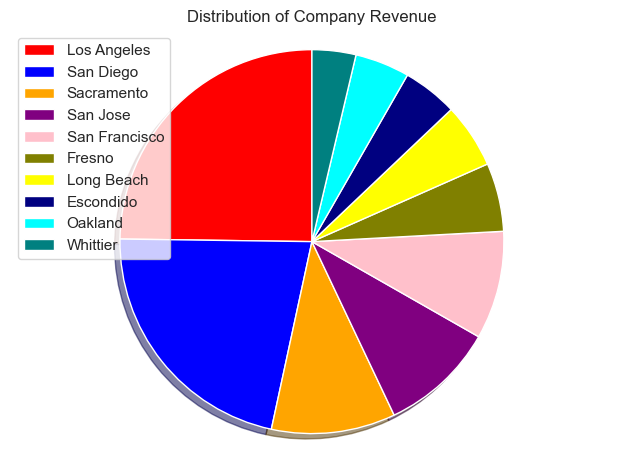

In [73]:
patches, texts = plt.pie(df_top_ten["Total Revenue"], 
colors= ["red","blue","orange",
"purple", "pink","olive","yellow","navy","aqua","teal","aliceblue",
                    "beige","brown","coral","cyan","green"],shadow=True, startangle=90)

plt.legend(patches, df_top_ten["City"],loc="best")


plt.title("Distribution of Company Revenue")
plt.axis('equal')
plt.tight_layout()
plt.show()

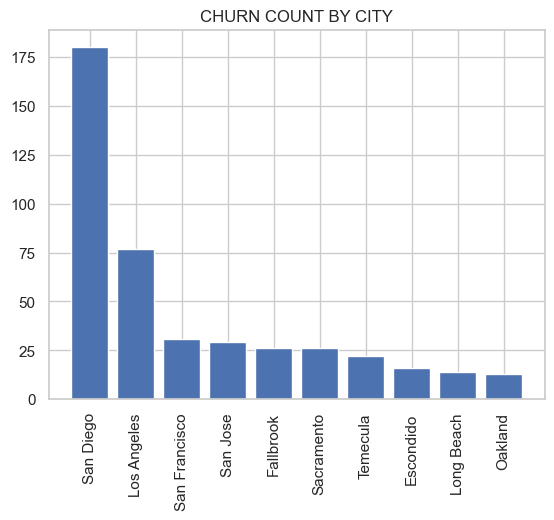

In [74]:
churn_by_city = data.groupby('City')['Customer Status'].apply(lambda x: (x == 'Churned').sum()).sort_values(ascending=False).head(10)
# Visualize the churn rate by customer city
plt.bar(churn_by_city.index, churn_by_city)
plt.title('CHURN COUNT BY CITY')
plt.xticks(rotation="vertical")
plt.show()


In [75]:
df_top=data[data["City"].isin(["Los Angeles","San Diego", "Sacramento","San Jose","San Francisco"])]
fig= px.histogram(df_top, color="Customer Status",
            y='City',barmode='group',opacity=1, 
             height=700)
fig.show()

#### churn

In [76]:
data_rev=data.groupby("Customer Status").mean()
data_rev["Status"]=data_rev.index
data_rev


Age  Number of Dependents  Number of Referrals  \
Customer Status                                                         
Churned          49.735726              0.119086             0.520935   
Joined           42.928571              0.366071             0.944196   
Stayed           45.544651              0.617127             2.615186   

                 Tenure in Months  Avg Monthly Long Distance Charges  \
Customer Status                                                        
Churned                 18.113105                          23.169315   
Joined                   1.720982                          22.299286   
Stayed                  41.080026                          22.930080   

                 Avg Monthly GB Download  Monthly Charge  Total Charges  \
Customer Status                                                           
Churned                        22.195759       74.622974    1544.354676   
Joined                         15.263393       43.406920      79.136049   
Stayed                         20.359793       62.959362    2791.574912   

                 Total Refunds  Total Extra Data Charges  \
Customer Status                                            
Churned               1.506052                  7.161501   
Joined                0.241853                  2.366071   
Stayed                2.277927                  7.191544   

                 Total Long Distance Charges  Total Revenue   Status  
Customer Status                                                       
Churned                           436.595802    1986.605927  Churned  
Joined                             38.127790     119.388058   Joined  
Stayed                            943.158609    3739.647138   Stayed

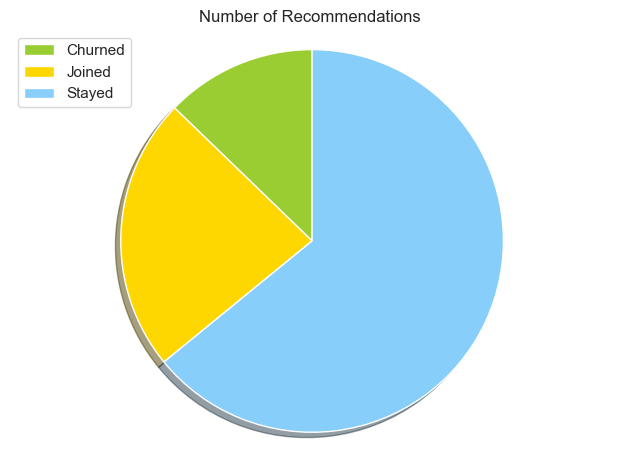

In [77]:
colors = ['yellowgreen', 'gold', 'lightskyblue']
patches, texts = plt.pie(data_rev["Number of Referrals"], colors=colors, shadow=True, startangle=90)

plt.legend(patches, data_rev["Status"], loc="best")

plt.title("Number of Recommendations ")
plt.axis('equal')
plt.tight_layout()
plt.show()

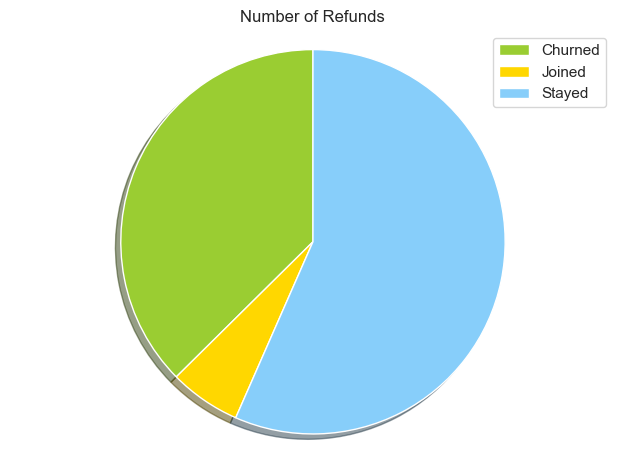

In [78]:
colors = ['yellowgreen', 'gold', 'lightskyblue']
patches, texts = plt.pie(data_rev["Total Refunds"], colors=colors, shadow=True, startangle=90)

plt.legend(patches, data_rev["Status"], loc="best")

plt.title("Number of Refunds")
plt.axis('equal')
plt.tight_layout()
plt.show()

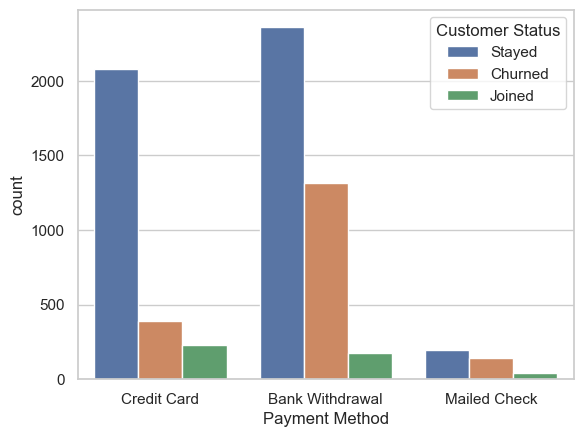

In [79]:
sns.countplot(data =data,x = 'Payment Method',hue = 'Customer Status')
plt.show()


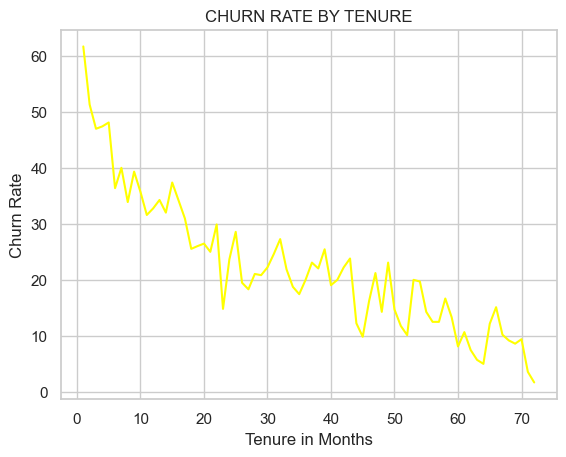

In [80]:
churn_by_tenure = data.groupby('Tenure in Months')['Customer Status'].apply(lambda x: (x == 'Churned').mean() * 100)
# Visualize the churn rate by customer tenure
plt.plot(churn_by_tenure.index, churn_by_tenure, color="yellow")
plt.xlabel('Tenure in Months')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY TENURE')
plt.show()

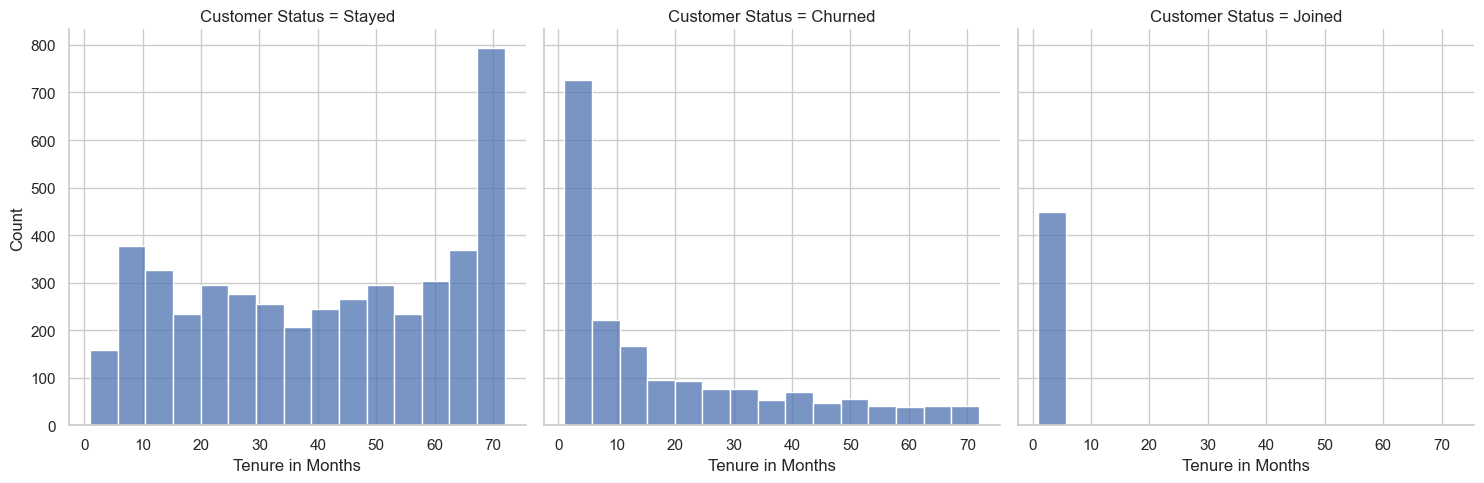

In [81]:
sns.displot(data = data, x = 'Tenure in Months', col = 'Customer Status',kind = 'hist')
plt.show()



<AxesSubplot:xlabel='Customer Status', ylabel='Monthly Charge'>

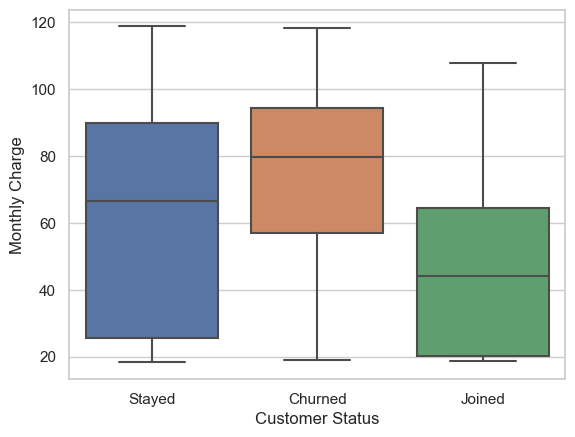

In [82]:
sns.boxplot(x='Customer Status',y='Monthly Charge', data=data)

#### test on 10 months

In [83]:
churned_in_10_months = data[(data['Customer Status'] == 'Churned') & (data['Tenure in Months'] <= 10)]

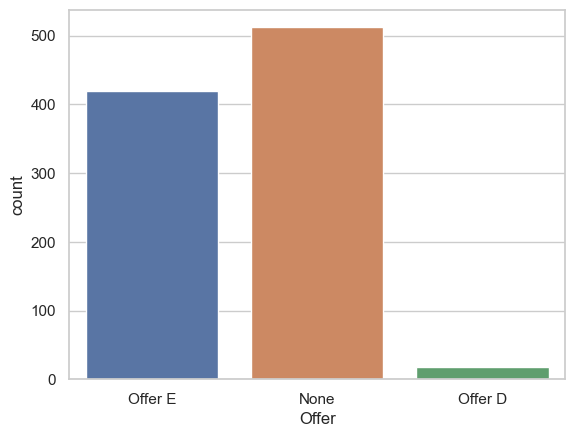

In [84]:
sns.countplot(data = churned_in_10_months, x = 'Offer')
plt.show()



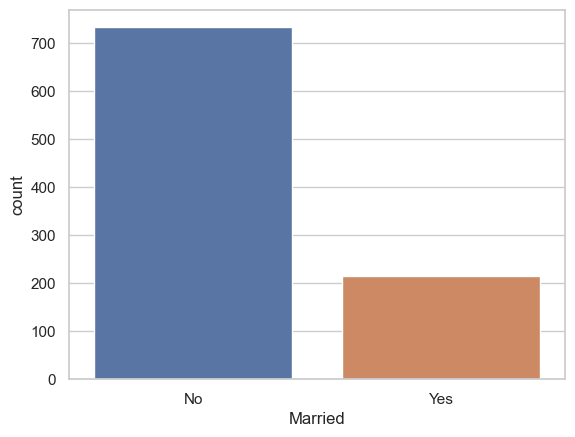

In [85]:
sns.countplot(data = churned_in_10_months, x = 'Married')
plt.show()





In [86]:
avg_monthly_charges = data.groupby('Customer Status')['Monthly Charge'].mean().reset_index(name = 'Avg_Monthly_Charges')

avg_monthly_charges

Customer Status  Avg_Monthly_Charges
0         Churned            74.622974
1          Joined            43.406920
2          Stayed            62.959362

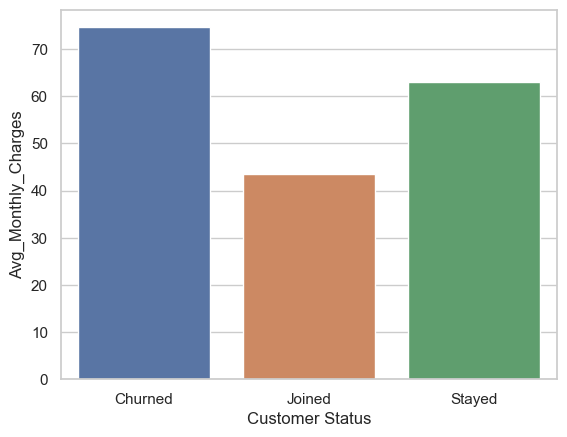

In [87]:
sns.barplot(data = avg_monthly_charges, x = 'Customer Status',y = 'Avg_Monthly_Charges')
plt.show()



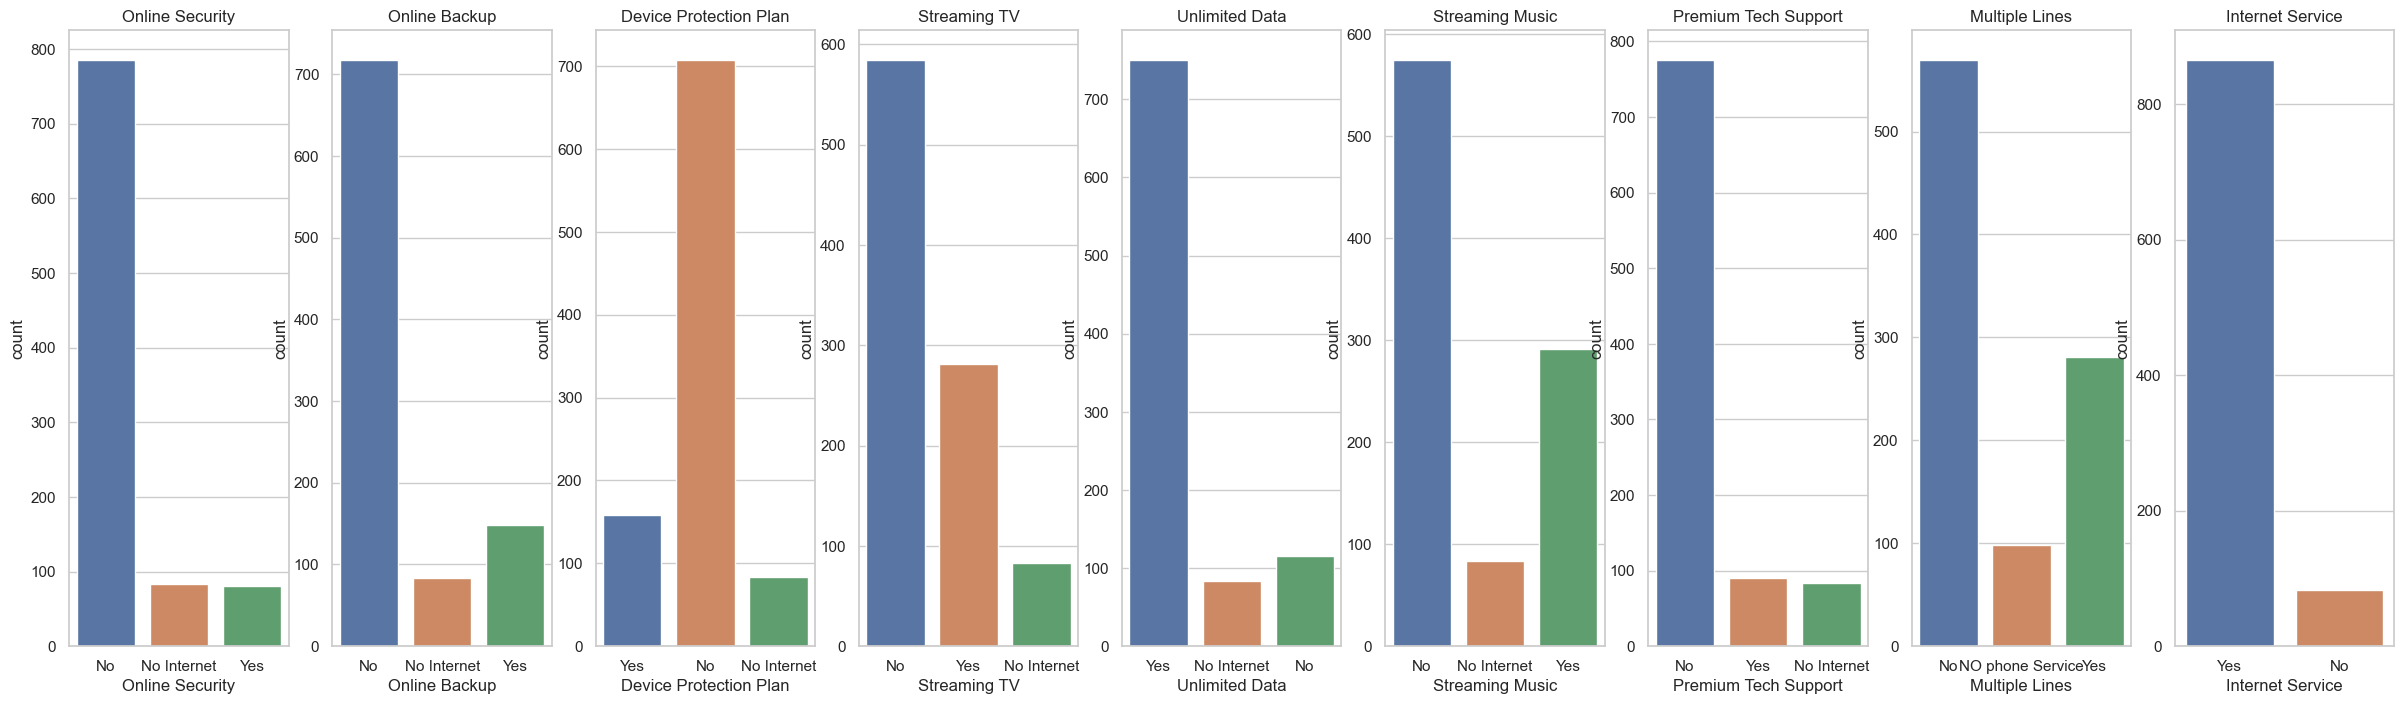

In [88]:
services = ['Online Security','Online Backup', 'Device Protection Plan','Streaming TV','Unlimited Data','Streaming Music','Premium Tech Support','Multiple Lines','Internet Service']

plt.figure(figsize=(30,8))

for i, serv in enumerate(services):
    ax = plt.subplot(1, len(services), i+1)
    sns.countplot(data = churned_in_10_months, x = str(serv))
    ax.set_title(f"{serv}")

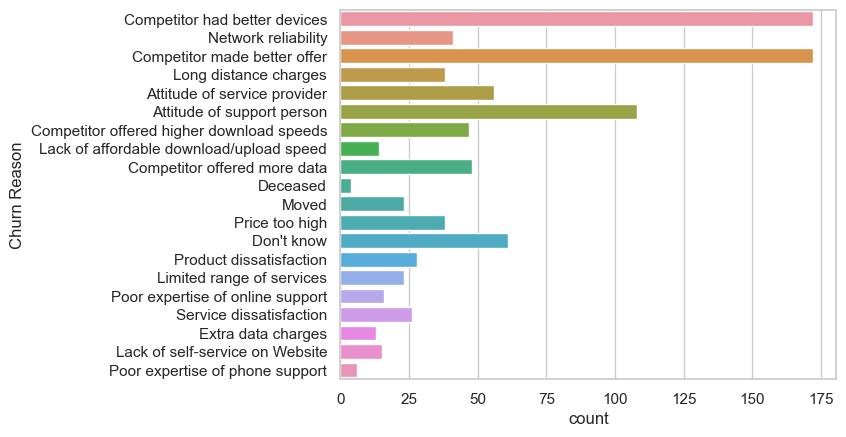

In [89]:
sns.countplot(data = churned_in_10_months, y= 'Churn Reason')
plt.show()


In [90]:
i=0
c=0
essai=[]
essai=data['Customer Status'].tolist()

for i in range(len(essai)):
    if essai[i]=='Churned' :
        c+=1
pourcentage=c/len(data['Customer Status'])
print(pourcentage)
    

0.2656362848476094


### p_value

In [91]:
ess=data['Tenure in Months'].tolist()


In [92]:
import random
taille_echantillon = 400
random.seed(42)
echantillon_aleatoire = random.sample(ess, taille_echantillon)




In [93]:
x_barre=np.mean(echantillon_aleatoire)
std=np.std(echantillon_aleatoire)
print(x_barre)
print(std)

31.8675
24.10196970685176


In [94]:
import math
x=(x_barre-30)/(std/ math.sqrt(400))
print(x)

1.5496658760375943


donc p-value est égale à 0,0618>0.05 donc H0 est acceptée

####  user type

data['Big Spenders'] = 0
data.loc[ data['Total Revenue'] >= data['Total Revenue'].mean() , 'Big Spenders'] = 1

data['Loyal Clients'] = 0
data.loc[ data['Tenure in Months'] >= data['Tenure in Months'].mean() , 'Loyal Clients'] = 1

data['Heavy Data Users'] = 0
data.loc[ data['Avg Monthly GB Download'] >= data['Avg Monthly GB Download'].mean() ,'Heavy Data Users'] = 1


### dataset splitting

In [95]:
churned = data[data['Customer Status'] != 'Joined']


In [96]:
churned=churned.drop('GB Range',axis=1)
churned=churned.drop('Age Range',axis=1)
churned=churned.drop('Churn Category',axis=1)
churned=churned.drop('Churn Reason',axis=1)


In [97]:
churned=churned.drop('City',axis=1)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [99]:
X = churned.drop('Customer Status',axis=1)
#X = X.drop('Big Spenders',axis=1)
#X = X.drop('Heavy Data Users',axis=1)
y = churned['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=321) 

In [100]:
churned

Gender  Age Married  Number of Dependents  Number of Referrals  \
0     Female   37     Yes                     0                    2   
2       Male   50      No                     0                    0   
3       Male   78     Yes                     0                    1   
4     Female   75     Yes                     0                    3   
5     Female   23      No                     3                    0   
...      ...  ...     ...                   ...                  ...   
7037  Female   36      No                     0                    0   
7038  Female   20      No                     0                    0   
7039    Male   40     Yes                     0                    1   
7041    Male   21     Yes                     0                    5   
7042    Male   36     Yes                     0                    1   

      Tenure in Months    Offer Phone Service  \
0                    9     None           Yes   
2                    4  Offer E           Yes   
3                   13  Offer D           Yes   
4                    3     None           Yes   
5                    9  Offer E           Yes   
...                ...      ...           ...   
7037                 4     None           Yes   
7038                13  Offer D           Yes   
7039                22  Offer D           Yes   
7041                67  Offer A           Yes   
7042                63     None            No   

      Avg Monthly Long Distance Charges    Multiple Lines Internet Service  \
0                                 42.39                No              Yes   
2                                 33.65                No              Yes   
3                                 27.82                No              Yes   
4                                  7.38                No              Yes   
5                                 16.77                No              Yes   
...                                 ...               ...              ...   
7037                               2.01                No               No   
7038                              46.68                No              Yes   
7039                              16.20               Yes              Yes   
7041                               2.12                No              Yes   
7042                               0.00  NO phone Service              Yes   

     Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0            Cable                     16.0              No           Yes   
2      Fiber Optic                     30.0              No            No   
3      Fiber Optic                      4.0              No           Yes   
4      Fiber Optic                     11.0              No            No   
5            Cable                     73.0              No            No   
...            ...                      ...             ...           ...   
7037   No Internet                      0.0     No Internet   No Internet   
7038           DSL                     59.0             Yes            No   
7039   Fiber Optic                     17.0              No            No   
7041         Cable                     58.0             Yes            No   
7042         Cable                      5.0             Yes           Yes   

     Device Protection Plan Premium Tech Support Streaming TV  \
0                        No                  Yes          Yes   
2                       Yes                   No           No   
3                       Yes                   No          Yes   
4                        No                  Yes          Yes   
5                        No                  Yes          Yes   
...                     ...                  ...          ...   
7037            No Internet          No Internet  No Internet   
7038                     No                  Yes           No   
7039                     No                   No           No   
7041                    Yes             

In [101]:
pd.Series({c: data.select_dtypes('object')[c].unique() for c in data.select_dtypes('object')})

Gender                                                       [Female, Male]
Married                                                           [Yes, No]
City                      [Frazier Park, Costa Mesa, Martinez, Camarillo...
Offer                     [None, Offer E, Offer D, Offer A, Offer B, Off...
Phone Service                                                     [Yes, No]
Multiple Lines                                  [No, Yes, NO phone Service]
Internet Service                                                  [Yes, No]
Internet Type                        [Cable, Fiber Optic, DSL, No Internet]
Online Security                                      [No, Yes, No Internet]
Online Backup                                        [Yes, No, No Internet]
Device Protection Plan                               [No, Yes, No Internet]
Premium Tech Support                                 [Yes, No, No Internet]
Streaming TV                                         [Yes, No, No Internet]
Streaming Mo

X_train['Internet Type'].value_counts()


Standardizing numeric columns

In [102]:
num_col = X_train.select_dtypes('number').columns
std_scaler = StandardScaler()
X_train[num_col] = std_scaler.fit_transform(X_train[num_col])
X_test[num_col] = std_scaler.transform(X_test[num_col])

In [103]:
oh_col = X.select_dtypes('object').columns #object columns to be one hot encoded 

oh_encoder = OneHotEncoder(sparse=False)
OH_encoded_train_features = oh_encoder.fit_transform(X_train[oh_col])
OH_encoded_X_train = pd.DataFrame(data=OH_encoded_train_features,index=X_train[oh_col].index,columns=oh_encoder.get_feature_names(X_train[oh_col].columns))

OH_encoded_test_features = oh_encoder.transform(X_test[oh_col])
OH_encoded_X_test = pd.DataFrame(data=OH_encoded_test_features,index=X_test[oh_col].index,columns=oh_encoder.get_feature_names(X_test[oh_col].columns))

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



cela donne le resultat dans une autre dataframe donc on doit concatener et puis effaces les anciennes colonnes avec les valeurs yes and no

In [104]:
X_train = pd.concat([X_train,OH_encoded_X_train],axis=1)
X_train = X_train.drop(X_train[oh_col],axis=1)
X_test = pd.concat([X_test,OH_encoded_X_test],axis=1)
X_test = X_test.drop(X_test[oh_col],axis=1)

In [105]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



<AxesSubplot:xlabel='Predicted', ylabel='Real'>

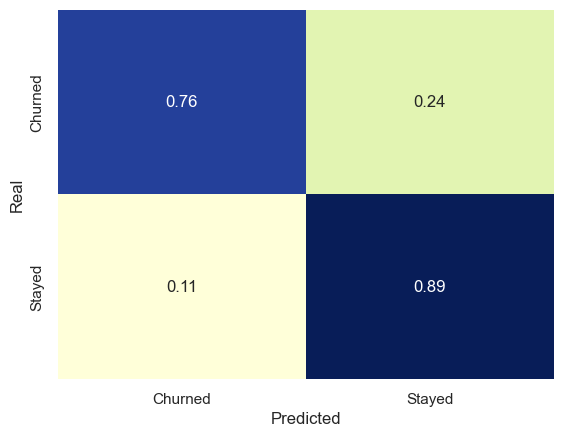

In [106]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Churned       0.74      0.76      0.75       368
      Stayed       0.90      0.89      0.90       927

    accuracy                           0.86      1295
   macro avg       0.82      0.83      0.82      1295
weighted avg       0.86      0.86      0.86      1295



In [108]:
test_df= pd.DataFrame(y_test) #convertir y_test de pandas.series à une dataframe
test_df

Customer Status
3628          Stayed
676          Churned
3131         Churned
4780          Stayed
3813         Churned
...              ...
5419          Stayed
6599         Churned
5857          Stayed
6966         Churned
587          Churned

[1295 rows x 1 columns]

In [109]:
test_df['y_pred'] = y_pred 
test_df

Customer Status   y_pred
3628          Stayed   Stayed
676          Churned   Stayed
3131         Churned   Stayed
4780          Stayed   Stayed
3813         Churned  Churned
...              ...      ...
5419          Stayed   Stayed
6599         Churned   Stayed
5857          Stayed   Stayed
6966         Churned  Churned
587          Churned   Stayed

[1295 rows x 2 columns]

In [110]:
test_df['Able to Churn'] = (test_df['Customer Status'] == 'Stayed') & (test_df['y_pred'] == 'Churned') #trouver les valeurs qui sont 'stayed' en reel et predicter comme 'churned' et les marquer comme true
test_df

Customer Status   y_pred  Able to Churn
3628          Stayed   Stayed          False
676          Churned   Stayed          False
3131         Churned   Stayed          False
4780          Stayed   Stayed          False
3813         Churned  Churned          False
...              ...      ...            ...
5419          Stayed   Stayed          False
6599         Churned   Stayed          False
5857          Stayed   Stayed          False
6966         Churned  Churned          False
587          Churned   Stayed          False

[1295 rows x 3 columns]

In [111]:
test_df['Able to Churn'] = test_df['Able to Churn'].astype(int) #transformer les valeurs de True/False en 1/0
test_df

Customer Status   y_pred  Able to Churn
3628          Stayed   Stayed              0
676          Churned   Stayed              0
3131         Churned   Stayed              0
4780          Stayed   Stayed              0
3813         Churned  Churned              0
...              ...      ...            ...
5419          Stayed   Stayed              0
6599         Churned   Stayed              0
5857          Stayed   Stayed              0
6966         Churned  Churned              0
587          Churned   Stayed              0

[1295 rows x 3 columns]

In [112]:
churned['Able to Churn'] = 0 #construire et initialiser la colonne avec des 0 dans le dataframe general (churned)
churned

Gender  Age Married  Number of Dependents  Number of Referrals  \
0     Female   37     Yes                     0                    2   
2       Male   50      No                     0                    0   
3       Male   78     Yes                     0                    1   
4     Female   75     Yes                     0                    3   
5     Female   23      No                     3                    0   
...      ...  ...     ...                   ...                  ...   
7037  Female   36      No                     0                    0   
7038  Female   20      No                     0                    0   
7039    Male   40     Yes                     0                    1   
7041    Male   21     Yes                     0                    5   
7042    Male   36     Yes                     0                    1   

      Tenure in Months    Offer Phone Service  \
0                    9     None           Yes   
2                    4  Offer E           Yes   
3                   13  Offer D           Yes   
4                    3     None           Yes   
5                    9  Offer E           Yes   
...                ...      ...           ...   
7037                 4     None           Yes   
7038                13  Offer D           Yes   
7039                22  Offer D           Yes   
7041                67  Offer A           Yes   
7042                63     None            No   

      Avg Monthly Long Distance Charges    Multiple Lines Internet Service  \
0                                 42.39                No              Yes   
2                                 33.65                No              Yes   
3                                 27.82                No              Yes   
4                                  7.38                No              Yes   
5                                 16.77                No              Yes   
...                                 ...               ...              ...   
7037                               2.01                No               No   
7038                              46.68                No              Yes   
7039                              16.20               Yes              Yes   
7041                               2.12                No              Yes   
7042                               0.00  NO phone Service              Yes   

     Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0            Cable                     16.0              No           Yes   
2      Fiber Optic                     30.0              No            No   
3      Fiber Optic                      4.0              No           Yes   
4      Fiber Optic                     11.0              No            No   
5            Cable                     73.0              No            No   
...            ...                      ...             ...           ...   
7037   No Internet                      0.0     No Internet   No Internet   
7038           DSL                     59.0             Yes            No   
7039   Fiber Optic                     17.0              No            No   
7041         Cable                     58.0             Yes            No   
7042         Cable                      5.0             Yes           Yes   

     Device Protection Plan Premium Tech Support Streaming TV  \
0                        No                  Yes          Yes   
2                       Yes                   No           No   
3                       Yes                   No          Yes   
4                        No                  Yes          Yes   
5                        No                  Yes          Yes   
...                     ...                  ...          ...   
7037            No Internet          No Internet  No Internet   
7038                     No                  Yes           No   
7039                     No                   No           No   
7041                    Yes             

In [113]:
probably_churn_indexes = test_df[test_df['Able to Churn'] == 1].index #identifier les indexes de probably_churn=1

In [114]:
churned.loc[probably_churn_indexes, 'Able to Churn'] = 1 #marquer probably_churn dans le dataframe 'churned' par '1'

In [115]:
churned

Gender  Age Married  Number of Dependents  Number of Referrals  \
0     Female   37     Yes                     0                    2   
2       Male   50      No                     0                    0   
3       Male   78     Yes                     0                    1   
4     Female   75     Yes                     0                    3   
5     Female   23      No                     3                    0   
...      ...  ...     ...                   ...                  ...   
7037  Female   36      No                     0                    0   
7038  Female   20      No                     0                    0   
7039    Male   40     Yes                     0                    1   
7041    Male   21     Yes                     0                    5   
7042    Male   36     Yes                     0                    1   

      Tenure in Months    Offer Phone Service  \
0                    9     None           Yes   
2                    4  Offer E           Yes   
3                   13  Offer D           Yes   
4                    3     None           Yes   
5                    9  Offer E           Yes   
...                ...      ...           ...   
7037                 4     None           Yes   
7038                13  Offer D           Yes   
7039                22  Offer D           Yes   
7041                67  Offer A           Yes   
7042                63     None            No   

      Avg Monthly Long Distance Charges    Multiple Lines Internet Service  \
0                                 42.39                No              Yes   
2                                 33.65                No              Yes   
3                                 27.82                No              Yes   
4                                  7.38                No              Yes   
5                                 16.77                No              Yes   
...                                 ...               ...              ...   
7037                               2.01                No               No   
7038                              46.68                No              Yes   
7039                              16.20               Yes              Yes   
7041                               2.12                No              Yes   
7042                               0.00  NO phone Service              Yes   

     Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0            Cable                     16.0              No           Yes   
2      Fiber Optic                     30.0              No            No   
3      Fiber Optic                      4.0              No           Yes   
4      Fiber Optic                     11.0              No            No   
5            Cable                     73.0              No            No   
...            ...                      ...             ...           ...   
7037   No Internet                      0.0     No Internet   No Internet   
7038           DSL                     59.0             Yes            No   
7039   Fiber Optic                     17.0              No            No   
7041         Cable                     58.0             Yes            No   
7042         Cable                      5.0             Yes           Yes   

     Device Protection Plan Premium Tech Support Streaming TV  \
0                        No                  Yes          Yes   
2                       Yes                   No           No   
3                       Yes                   No          Yes   
4                        No                  Yes          Yes   
5                        No                  Yes          Yes   
...                     ...                  ...          ...   
7037            No Internet          No Internet  No Internet   
7038                     No                  Yes           No   
7039                     No                   No           No   
7041                    Yes             

In [116]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)



<AxesSubplot:xlabel='Predicted', ylabel='Real'>

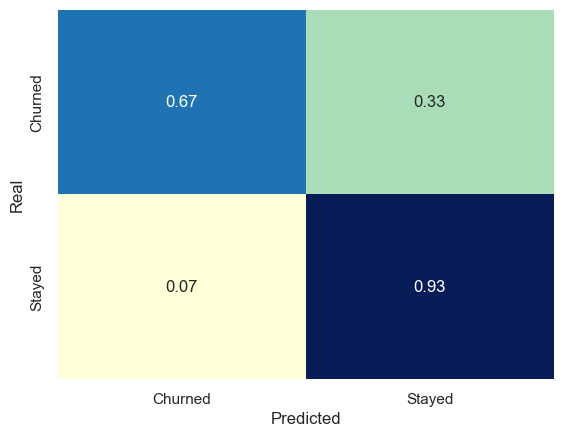

In [117]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Churned       0.79      0.67      0.73       368
      Stayed       0.88      0.93      0.90       927

    accuracy                           0.86      1295
   macro avg       0.83      0.80      0.81      1295
weighted avg       0.85      0.86      0.85      1295



In [119]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1000)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Real'>

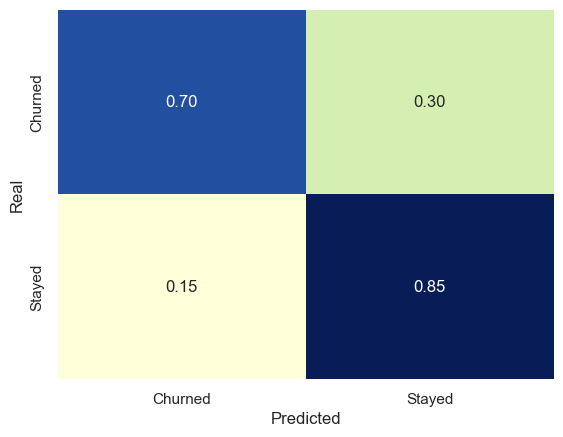

In [120]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Churned       0.65      0.70      0.67       368
      Stayed       0.88      0.85      0.86       927

    accuracy                           0.81      1295
   macro avg       0.76      0.78      0.77      1295
weighted avg       0.81      0.81      0.81      1295



### amélioration

In [122]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [123]:
bins = [19,30,45,60,80]
names = ['19-30','30-45','45-60','60-80']
def eng_df():
    df_eng = churned.copy()
    df_eng['AgeRange'] = pd.cut(df_eng['Age'],bins, labels=names,include_lowest=True).astype('object')
    df_eng['is_loyal'] = np.where(df_eng['Tenure in Months'] >= 30, 'Yes','No')
    df_eng['Refunds_cat'] = np.where(df_eng['Total Refunds'] == 0,'NO','YES')
    df_eng['BigSpenders'] = np.where(df_eng['Total Revenue'] >= df_eng['Total Revenue'].mean(), 'Yes','No')
    df_eng['Dependents_cat'] = np.where(df_eng['Number of Dependents'] == 0,'NO','YES')
    df_eng['Extra_Data_Charges_cat'] = np.where(df_eng['Total Extra Data Charges'] == 0,'NO','YES')
    df_eng['Referrals_cat'] = np.where(df_eng['Number of Referrals'] == 0, 'NO', 'Yes')
    return df_eng
    
df_eng = eng_df()

 

In [124]:
df_smote = eng_df()

In [125]:
X_a = df_smote.drop('Customer Status',axis=1)
X_a = X_a.drop('Tenure in Months by Year',axis=1)
#X_a= X_a.drop('Loyal Clients',axis=1)
#X_a= X_a.drop('Big Spenders',axis=1)
#X_a= X_a.drop('Heavy Data Users',axis=1)
y_a = df_smote['Customer Status']
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a,y_a,test_size=0.2,stratify=y_a,random_state=123) 

In [126]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=(X_train_a.dtypes == "object").values,random_state=42)

In [127]:
num_col = X_train_a.select_dtypes('number').columns
std_scaler = StandardScaler()
X_train_a[num_col] = std_scaler.fit_transform(X_train_a[num_col])
X_test_a[num_col] = std_scaler.transform(X_test_a[num_col])

In [128]:
#--- Label encoding the Ordinal Internet Type Variable ---
ord_encoder = OrdinalEncoder()
X_train_a[['Internet Type','AgeRange']] = ord_encoder.fit_transform(X_train_a[['Internet Type','AgeRange']])
X_test_a[['Internet Type','AgeRange']] = ord_encoder.transform(X_test_a[['Internet Type','AgeRange']])

In [129]:
oh_col = X_a.select_dtypes('object').drop(['Internet Type','AgeRange'],axis=1).columns #object columns to be one hot encoded 

oh_encoder = OneHotEncoder(sparse=False)
OH_encoded_train_features = oh_encoder.fit_transform(X_train_a[oh_col])
OH_encoded_X_train = pd.DataFrame(data=OH_encoded_train_features,index=X_train_a[oh_col].index,columns=oh_encoder.get_feature_names(X_train_a[oh_col].columns))

OH_encoded_test_features = oh_encoder.transform(X_test_a[oh_col])
OH_encoded_X_test = pd.DataFrame(data=OH_encoded_test_features,index=X_test_a[oh_col].index,columns=oh_encoder.get_feature_names(X_test_a[oh_col].columns))

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [130]:
X_train_a = pd.concat([X_train_a,OH_encoded_X_train],axis=1)
X_train_a = X_train_a.drop(X_train_a[oh_col],axis=1)
X_test_a = pd.concat([X_test_a,OH_encoded_X_test],axis=1)
X_test_a = X_test_a.drop(X_test_a[oh_col],axis=1)


In [131]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train_a,y_train_a)
y_pred_a = lgr.predict(X_test_a)



<AxesSubplot:xlabel='Predicted', ylabel='Real'>

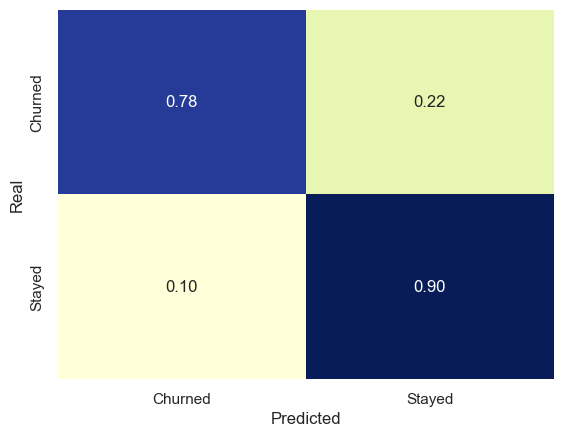

In [132]:
conf_matrix = pd.crosstab(y_test_a,y_pred_a,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

In [133]:
print(classification_report(y_test_a,y_pred_a))

              precision    recall  f1-score   support

     Churned       0.75      0.78      0.76       368
      Stayed       0.91      0.90      0.90       927

    accuracy                           0.86      1295
   macro avg       0.83      0.84      0.83      1295
weighted avg       0.86      0.86      0.86      1295



### prédiction ave PCA

In [134]:
churned_pca = data_pca[data_pca['Customer Status'] != 'Joined']

In [135]:
X = churned_pca[['principal_component_1','principal_component_2']]
y = churned_pca['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=321) 

In [136]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Real'>

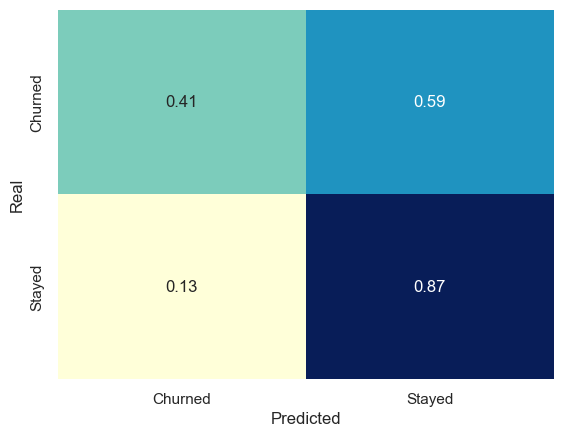

In [137]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Churned       0.55      0.41      0.47       368
      Stayed       0.79      0.87      0.83       927

    accuracy                           0.74      1295
   macro avg       0.67      0.64      0.65      1295
weighted avg       0.72      0.74      0.73      1295



In [139]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1000)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)


<AxesSubplot:xlabel='Predicted', ylabel='Real'>

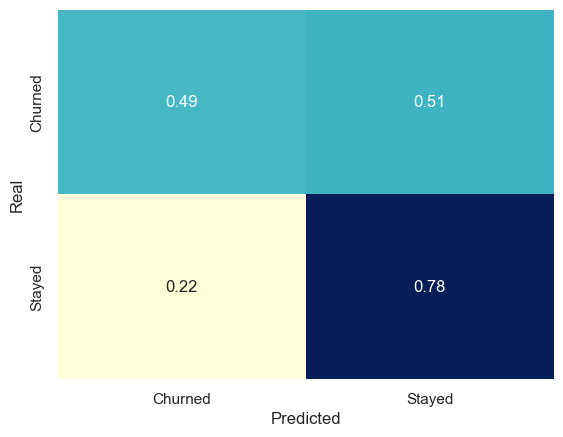

In [140]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Churned       0.47      0.49      0.48       368
      Stayed       0.80      0.78      0.79       927

    accuracy                           0.70      1295
   macro avg       0.63      0.64      0.64      1295
weighted avg       0.70      0.70      0.70      1295



In [142]:
a=data["Total Charges"].iloc[:150]
b=data["Total Revenue"].iloc[:150]
X=a.values
Y=b.values
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate theta1 and theta2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print("coefficients for regression",b1, b0)

coefficients for regression 1.1909297507331784 192.0113894081196


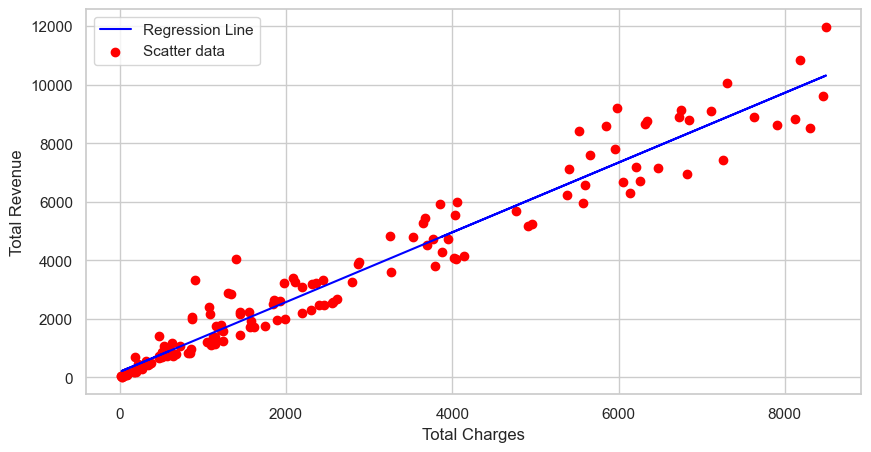

In [143]:
# Plotting Values and Regression Line
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 5.0)
# max_x = np.max(X) + 100
# min_x = np.min(X) - 100

y = b0 + b1 * X

# Ploting Line
plt.plot(X, y, color='blue', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='red', label='Scatter data')

plt.xlabel("Total Charges")
plt.ylabel("Total Revenue")
plt.legend()
plt.show()

In [144]:
y_predict=b0+b1*1281.00
print(y_predict)

1717.5924000973212


In [145]:
data['Total Charges'].value_counts()

20.20      10
19.75       9
19.90       8
19.65       8
20.05       8
           ..
675.60      1
1132.35     1
711.90      1
1281.00     1
3707.60     1
Name: Total Charges, Length: 6435, dtype: int64

In [146]:
condition = data['Total Charges'] == 1281.00
result = data[condition]
result

Gender  Age Married  Number of Dependents     City  Number of Referrals  \
2353   Male   76      No                     0  Bayside                    0   

      Tenure in Months Offer Phone Service  Avg Monthly Long Distance Charges  \
2353                16  None           Yes                              19.18   

     Multiple Lines Internet Service Internet Type  Avg Monthly GB Download  \
2353            Yes              Yes   Fiber Optic                     22.0   

     Online Security Online Backup Device Protection Plan  \
2353              No            No                     No   

     Premium Tech Support Streaming TV Streaming Movies Streaming Music  \
2353                   No          Yes               No              No   

     Unlimited Data        Contract Paperless Billing   Payment Method  \
2353            Yes  Month-to-Month               Yes  Bank Withdrawal   

      Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
2353            86.6         1281.0            0.0                         0   

      Total Long Distance Charges  Total Revenue Customer Status  \
2353                       306.88        1587.88         Churned   

       Churn Category         Churn Reason GB Range Age Range  \
2353  Dissatisfaction  Network reliability     avg+       65+   

     Tenure in Months by Year  
2353                        2